In [1]:
from __future__ import division
import imp
import uproot
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os
import ROOT
import time
import math
from array import array
import collections

inputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
outputdir = inputdir+'xsec_momentum_fakedata/' 
output_filedir = outputdir
input_filedir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
lib_function_dir = '/home/tmettler/Desktop/uBoone/do_plots/'

# helper functions
globale = imp.load_source('globale',lib_function_dir+'globale.py')
NuCC = imp.load_source('NuCC_function',lib_function_dir+'NuCC_function.py')
NuCC_w = imp.load_source('NuCCWeight_function',lib_function_dir+'NuCCWeight_function.py')

Welcome to JupyROOT 6.10/08


In [2]:
#!jupyter nbconvert --to script numuCCana_xsec_weighted.ipynb

In [3]:
# initialte ROOT default canvas
ROOT.gROOT.SetBatch(ROOT.kTRUE)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.18)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


# Cross section for single differnetial in Momentum (no sys)

In [4]:
# Load input files
#inputdir = '/home/thomasm/numuCC/V33/10kevents/'
outputdir_png, outputdir_root,outputdir_pdf = NuCC.prepareOutput2(outputdir)
try:
    os.stat(output_filedir)
except:
    os.mkdir(output_filedir)
RootFile = ROOT.TFile(output_filedir+"xsec_momentum_fake_data.root","RECREATE");

#filename_overlay = 'NuCCana_Overlay_V18_V4.root'
filename_overlay = 'NuCCana_overlay_V26_weight.root'
#filename_overlay = 'NuCCana_overlay_v25_weighted_all.root'
filename_data = 'NuCCana_fakedata_Set2_3b.root'
filename_ext = 'NuCCana_ext_V25.root'
filename_dirt = 'NuCCana_dirt_V26_weight.root'
    
tree_name = 'numuCCAna'

In [5]:
#Open all the trees of the four files (data, ext, dirt, overlay)

data, ext, dirt, overlay = NuCC.openTrees(inputdir, filename_data, filename_ext, filename_dirt, filename_overlay, tree_name)
NuCC.printNumberOfEntries(data,ext,dirt,overlay)

pot_fakedata = NuCC.getPOT(inputdir,filename_data,tree_name)
pot_overlay = NuCC.getPOT(inputdir,filename_overlay,tree_name)
pot_dirt =  NuCC.getPOT(inputdir,filename_dirt,tree_name)
#V25 files

print pot_fakedata
pot_data =    7.644e+18  # best with tor875
pot_data = pot_fakedata
data_trigger = 1838700.0 #2220362.0 #1854495.0 #4743794 # 1987072.0 # E1DCNT_wcut
ext_trigger =  18997529.0  #2120135 #5685315 # EXT

print 'POT: '
print 'Data:\t\t', pot_data
print 'Ext:\t\t', 0
print 'Overlay:\t', pot_overlay
print 'Dirt:\t\t', pot_dirt
print ''
sample = [data,ext,overlay,dirt]
scale = {data:1.0,ext:1.0,overlay:1.0,dirt:1.0}
name = {data:'data',ext:'ext',overlay:'overlay',dirt:'dirt'}

scale[data], scale[ext], scale[dirt], scale[overlay] = NuCC.calculateScale(data_trigger, ext_trigger, pot_data, pot_dirt, pot_overlay)

scale[dirt] = scale[dirt]
scale[overlay] = scale[overlay]
print 'Scalefactors: '
print 'Data:\t\t', scale[data]
print 'Ext:\t\t', scale[ext]
print 'Overlay:\t', scale[overlay]
print 'Dirt:\t\t', scale[dirt]


Overlay: Number of Entries:	989745
Data: Number of Entries:	364769
Ext: Number of Entries:		222702
Dirt: Number of Entries:	40808

3.54124623456e+20
POT: 
Data:		3.54124623456e+20
Ext:		0
Overlay:	1.24025430537e+21
Dirt:		1.25019694173e+20

Scalefactors: 
Data:		1.0
Ext:		0.0967862715198
Overlay:	0.2855258167
Dirt:		2.8325507097


Warning in <TClass::Init>: no dictionary for class ROOT::TIOFeatures is available


In [6]:
if 1:
    filename_overlay = filename_overlay+'out4.root'
    #filename_overlay = 'NuCCana_overlay_points_1kev.rootout2.root'
    filename_data = filename_data+'out4.root'
    filename_ext = filename_ext+'out4.root'
    filename_dirt = filename_dirt+'out4.root'

    tree_name = 't_out'

    data_out, ext_out, dirt_out, overlay_out = NuCC.openTreesOut(inputdir, filename_data, filename_ext, filename_dirt, filename_overlay, tree_name)
    NuCC.printNumberOfEntries(data_out,ext_out,dirt_out,overlay_out)

    sample_out = [data_out,ext_out,overlay_out,dirt_out]
    scale_out = {data_out:1.0,ext_out:1.0,overlay_out:1.0,dirt_out:1.0}
    name_out = {data_out:'data',ext_out:'ext',overlay_out:'overlay',dirt_out:'dirt'}

    scale_out[data_out], scale_out[ext_out], scale_out[dirt_out], scale_out[overlay_out] = NuCC.calculateScale(data_trigger, ext_trigger, pot_data, pot_dirt, pot_overlay)
    scale_out[dirt_out] = scale_out[dirt_out]
    scale_out[overlay_out] = scale_out[overlay_out]

Overlay: Number of Entries:	989714
Data: Number of Entries:	364768
Ext: Number of Entries:		222701
Dirt: Number of Entries:	40800



In [7]:
##### flux and number of tragets parameters###
flux = 1.16859e11/1.592e20 # flux per POT per cm2
print flux
flux = 7.3789785277e-10
print flux
roh_data = 1.3836 #data denisity g/cm3
roh_MC = 1.3954 # MC denisity g/cm3
mol = 39.95 # g for argon
N_A = 6.022140857e23 # molec/mol avogadro zahl
N_nucleons = 40.0
V_fid = ((254.8-10)-(-1.55+10))*((117.47-10)-(-115.53+10))*((1036.9-50)-(-0.1+10))
print 'Fiducial Volume: ', V_fid
##############################################

beam_flux = flux * pot_data
print 'Beam flux = {:.5e}'.format(beam_flux),' /cm2'
N_tot = roh_data*N_A*N_nucleons*V_fid/mol
print 'Number of target nuclei= {:.5e}'.format(N_tot),' /cm3'

7.34038944724e-10
7.3789785277e-10
Fiducial Volume:  49184671.35
Beam flux = 2.61308e+11  /cm2
Number of target nuclei= 4.10331e+31  /cm3


In [8]:
# Define signals

fidVol = '(Nu_Vx_sce>(-1.55+10) && Nu_Vx_sce<(254.8-10)) && (Nu_Vy_sce>(-115.53+10) && Nu_Vy_sce<(117.47-10)) &&(Nu_Vz_sce>(-0.1+10) && Nu_Vz_sce<(1036.9-50))'
MCfidVol = '(MCNu_Vx>(-1.55+10) && MCNu_Vx<(254.8-10)) && (MCNu_Vy>(-115.53+10) && MCNu_Vy<(117.47-10)) &&(MCNu_Vz>(-0.1+10) && MCNu_Vz<(1036.9-50))'
numu_signal = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG==13 && MCTrackPurity>0.5' # numu CC signal definition
numu_true = 'MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14' # numu CC signal definition
numu_nomu = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG!=13 && MCTrackPurity>0.5' # not an MC muon
numu_lowpur = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPurity<0.5' #low purity
numu_nc = 'fidVol && MCfidVol && MCNu_CCNC==1' # nutral current
numu_ov = 'fidVol && !MCfidVol' # out of fiducial
numu_other = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG!=14' # e.g anti nu or nue
#signal = 'MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14'
for x in sample:
    x.SetAlias('muon','(muon_candidate_key==track_key)')
    
num_fidVol = {}
for x in sample:
    x.SetAlias('fidVol',fidVol)
    x.SetAlias('MCfidVol',MCfidVol)
    x.SetAlias('numu_signal',numu_signal)
    x.SetAlias('numu_true',numu_true)
    x.SetAlias('numu_nomu',numu_nomu)
    x.SetAlias('numu_lowpur',numu_lowpur)
    x.SetAlias('numu_nc',numu_nc)
    x.SetAlias('numu_ov',numu_ov)
    x.SetAlias('numu_other',numu_other)
    num_fidVol[x] = x.GetEntries('fidVol && muon')*scale[x]
    
tot_num_fidVol = num_fidVol[ext]+num_fidVol[dirt]+num_fidVol[overlay]
overlay_signals = {'numu_signal','numu_nomu','numu_lowpur','numu_nc','numu_ov','numu_other'}

In [9]:
for x in sample_out:
    x.SetAlias('muon','(track_key == key_muon)')

num_fidVol = {}
for x in sample_out:
    x.SetAlias('fidVol',fidVol)
    x.SetAlias('MCfidVol',MCfidVol)
    x.SetAlias('numu_signal',numu_signal)
    x.SetAlias('numu_true',numu_true)
    x.SetAlias('numu_nomu',numu_nomu)
    x.SetAlias('numu_lowpur',numu_lowpur)
    x.SetAlias('numu_nc',numu_nc)
    x.SetAlias('numu_ov',numu_ov)
    x.SetAlias('numu_other',numu_other)

In [10]:
# Load the global variables for access of functions
NuCC.loadGlobal(data,ext,dirt,overlay,data_out,ext_out,dirt_out,overlay_out,scale,scale_out,tot_num_fidVol,overlay_signals,sample,sample_out, name,name_out, outputdir_png, outputdir_root,outputdir_pdf)
#NuCC.printGlobal()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [11]:
# initialte ROOT default canvas
ROOT.gStyle.SetOptStat(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.18)
c1.SetBottomMargin(0.14)

In [12]:
'''track_start_border_x = '(TrackStart_x_sce <(-1.55+1) || TrackStart_x_sce > (254.8-1))'
track_end_border_x = '(TrackEnd_x_sce <(-1.55+1) || TrackEnd_x_sce > (254.8-1))'
track_start_border_y = '(TrackStart_y_sce <(-115.53+1) || TrackStart_y_sce > (117.47-1))'
track_end_border_y = '(TrackEnd_y_sce <(-115.53+1) || TrackEnd_y_sce > (117.47-1))'
track_start_border_z = '(TrackStart_z_sce <(0.1+1) || TrackStart_z_sce > (1036.9-1))'
track_end_border_z = '(TrackEnd_z_sce <(0.1+1) || TrackEnd_z_sce > (1039.9-1))'
'''
track_start_border_x = '(TrackStart_x_sce <(-1.55+5) || TrackStart_x_sce > (254.8-5))'
track_end_border_x = '(TrackEnd_x_sce <(-1.55+5) || TrackEnd_x_sce > (254.8-5))'
track_start_border_y = '(TrackStart_y_sce <(-115.53+5) || TrackStart_y_sce > (117.47-5))'
track_end_border_y = '(TrackEnd_y_sce <(-115.53+5) || TrackEnd_y_sce > (117.47-5))'
track_start_border_z = '(TrackStart_z_sce <(0.1+5) || TrackStart_z_sce > (1036.9-5))'
track_end_border_z = '(TrackEnd_z_sce <(0.1+5) || TrackEnd_z_sce > (1039.9-5))'

track_end_uncontained = '(' + track_end_border_x + ' || ' + track_end_border_y + ' || ' + track_end_border_z+ ')'


data.SetAlias("track_end_uncontained",track_end_uncontained)
ext.SetAlias("track_end_uncontained",track_end_uncontained)
overlay.SetAlias("track_end_uncontained",track_end_uncontained)
dirt.SetAlias("track_end_uncontained",track_end_uncontained)
data_out.SetAlias("track_end_uncontained",track_end_uncontained)
ext_out.SetAlias("track_end_uncontained",track_end_uncontained)
overlay_out.SetAlias("track_end_uncontained",track_end_uncontained)
dirt_out.SetAlias("track_end_uncontained",track_end_uncontained)

data.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-4)<0.9 || crtt0_time==-1)")
ext.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-3.57+3.195-4)<0.9 || crtt0_time==-1)")
overlay.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")
dirt.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")
data_out.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-3.95)<0.9 || crtt0_time==-1)")
ext_out.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-3.57+3.195-3.95)<0.9 || crtt0_time==-1)")
overlay_out.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")
dirt_out.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")

crt_tom_cut = 'nr_crthit_top==0 && crthit_vertex_zcut==0 && (track_end_uncontained==1 || nr_crthit_beam_tres==0) && crt_cut'

data.SetAlias("crt_tom_cut",crt_tom_cut)
ext.SetAlias("crt_tom_cut",crt_tom_cut)
overlay.SetAlias("crt_tom_cut",crt_tom_cut)
dirt.SetAlias("crt_tom_cut",crt_tom_cut)
data_out.SetAlias("crt_tom_cut",crt_tom_cut)
ext_out.SetAlias("crt_tom_cut",crt_tom_cut)
overlay_out.SetAlias("crt_tom_cut",crt_tom_cut)
dirt_out.SetAlias("crt_tom_cut",crt_tom_cut)

weight_name = 'EventWeight*TunedCentralValue_Genie'


In [84]:
# calculate total flux integrated cross section:
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'
N_data = data_out.GetEntries(cut)
#N_ext  = ext_out.GetEntries(cut)*scale_out[ext_out]
#N_dirt = dirt_out.GetEntries(cut)*scale_out[dirt_out]
N_overlay = overlay_out.GetEntries(cut+'&& !numu_signal')*scale_out[overlay_out]
N_signal = overlay_out.GetEntries(cut+'&& numu_signal')*scale_out[overlay_out]
N_true = overlay_out.GetEntries('numu_true')*scale_out[overlay_out]

print N_overlay

h_weight_func = ROOT.TH1F("h_weight_func",'h_weight_func',10000,0,1000)
#globale.overlay_out.Draw(weight_name+'>>h_weight_func',cut+' && 1','0')
#dirt_pass_weight = h_weight_func.GetMean() 
globale.overlay_out.Draw(weight_name+'>>h_weight_func',cut+' && numu_signal','0') # weights for signal definition
overlay_signal = h_weight_func.GetMean()
globale.overlay_out.Draw(weight_name+'>>h_weight_func',cut+' && !numu_signal','0') # weights for signal definition
overlay_pass_weight = h_weight_func.GetMean()

overlay_out.Draw(weight_name+'>>h_weight_func','numu_true','0') # weights for signal definition
overlay_true_weight = h_weight_func.GetMean()

print overlay_pass_weight

#N_dirt = N_dirt*dirt_pass_weight
N_overlay = N_overlay*overlay_pass_weight
N_signal = N_signal*overlay_signal
N_true = N_true*overlay_true_weight
eff = N_signal/N_true

sigma_tot = (N_data- (N_overlay))/(eff*beam_flux*N_tot)
print 'Number of data:', N_data
#print 'Number of ext:', N_ext
#print 'Number of dirt:', N_dirt
print 'Number of overlay:', N_overlay
print 'Number of overlay signal:', N_signal
print 'Efficiency: ',eff
print 'Total integrated cross section:', sigma_tot

sigma_tot_MC = (N_signal)/(eff*beam_flux*N_tot)
print 'Total integrated cross section for MC:', sigma_tot_MC

8294.81050096
1.11470866893
Number of data: 61666
Number of overlay: 9246.29717255
Number of overlay signal: 45178.0818389
Efficiency:  0.525802793429
Total integrated cross section: 9.29789952914e-39
Total integrated cross section for MC: 8.01342325881e-39


In [14]:
target_nucl_fd = 4.10331109202e+31
flux_fd = 3.54124623456e+20*7.3789785277e-10
print flux_fd

print beam_flux
print N_tot

2.61307799261e+11
2.61307799261e+11
4.10331109202e+31


In [97]:
from array import array
mom_bins = [ 0.00, 0.18, 0.30, 0.45, 0.77, 1.28, 2.50 ]
np.save('/home/tmettler/Desktop/weighted/xsec_momentum_fakedata/Wes/momentum_bins',mom_bins)
binnum = len(mom_bins) - 1
h_xsec_mom = ROOT.TH1F('h_xsec_mom','h_xsec_mom',binnum,array('f',mom_bins))

Warning in <TFile::Append>: Replacing existing TH1: h_xsec_mom (Potential memory leak).


In [98]:
x = np.load('/home/tmettler/Desktop/weighted/xsec_momentum_fakedata/Wes/momentum_bins.npy')
print x

[0.   0.18 0.3  0.45 0.77 1.28 2.5 ]


In [99]:
def draw_adding():
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/30.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()

    pot_latex = ROOT.TLatex(.10, .92,'Accumulated POT: '+str(pot_data)) 
    pot_latex.SetTextFont(62);
    pot_latex.SetTextColor(ROOT.kGray+2);
    pot_latex.SetNDC();
    pot_latex.SetTextSize(1/30.);
    pot_latex.SetTextAlign(10) #;//left adjusted
    pot_latex.Draw();
    
    return prelim, pot_latex

def draw_sim():
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Simulation Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/30.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()
    
    return prelim

In [100]:
# initialte ROOT default canvas
ROOT.gStyle.SetOptStat(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.05)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


[0.07935011 0.38332173 0.48265615 0.57605541 0.67807549 0.69709468]


Warning in <TFile::Append>: Replacing existing TH1: h_init_eff_energy (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_init_eff_energy (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_init_eff_energy_1 (Potential memory leak).
Info in <TEfficiency::TEfficiency>: given histograms are filled with weights
Info in <TROOT::TEfficiency::SetUseWeightedEvents>: Histograms are filled with weights
Warning in <TEfficiency::GetEfficiencyErrorLow>: frequentist confidence intervals for weights are only supported by the normal approximation
Info in <TEfficiency::GetEfficiencyErrorLow>: setting statistic option to kFNormal
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/png/h_eff_trueMom.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/root/h_eff_trueMom.root has been created
Info in <TC

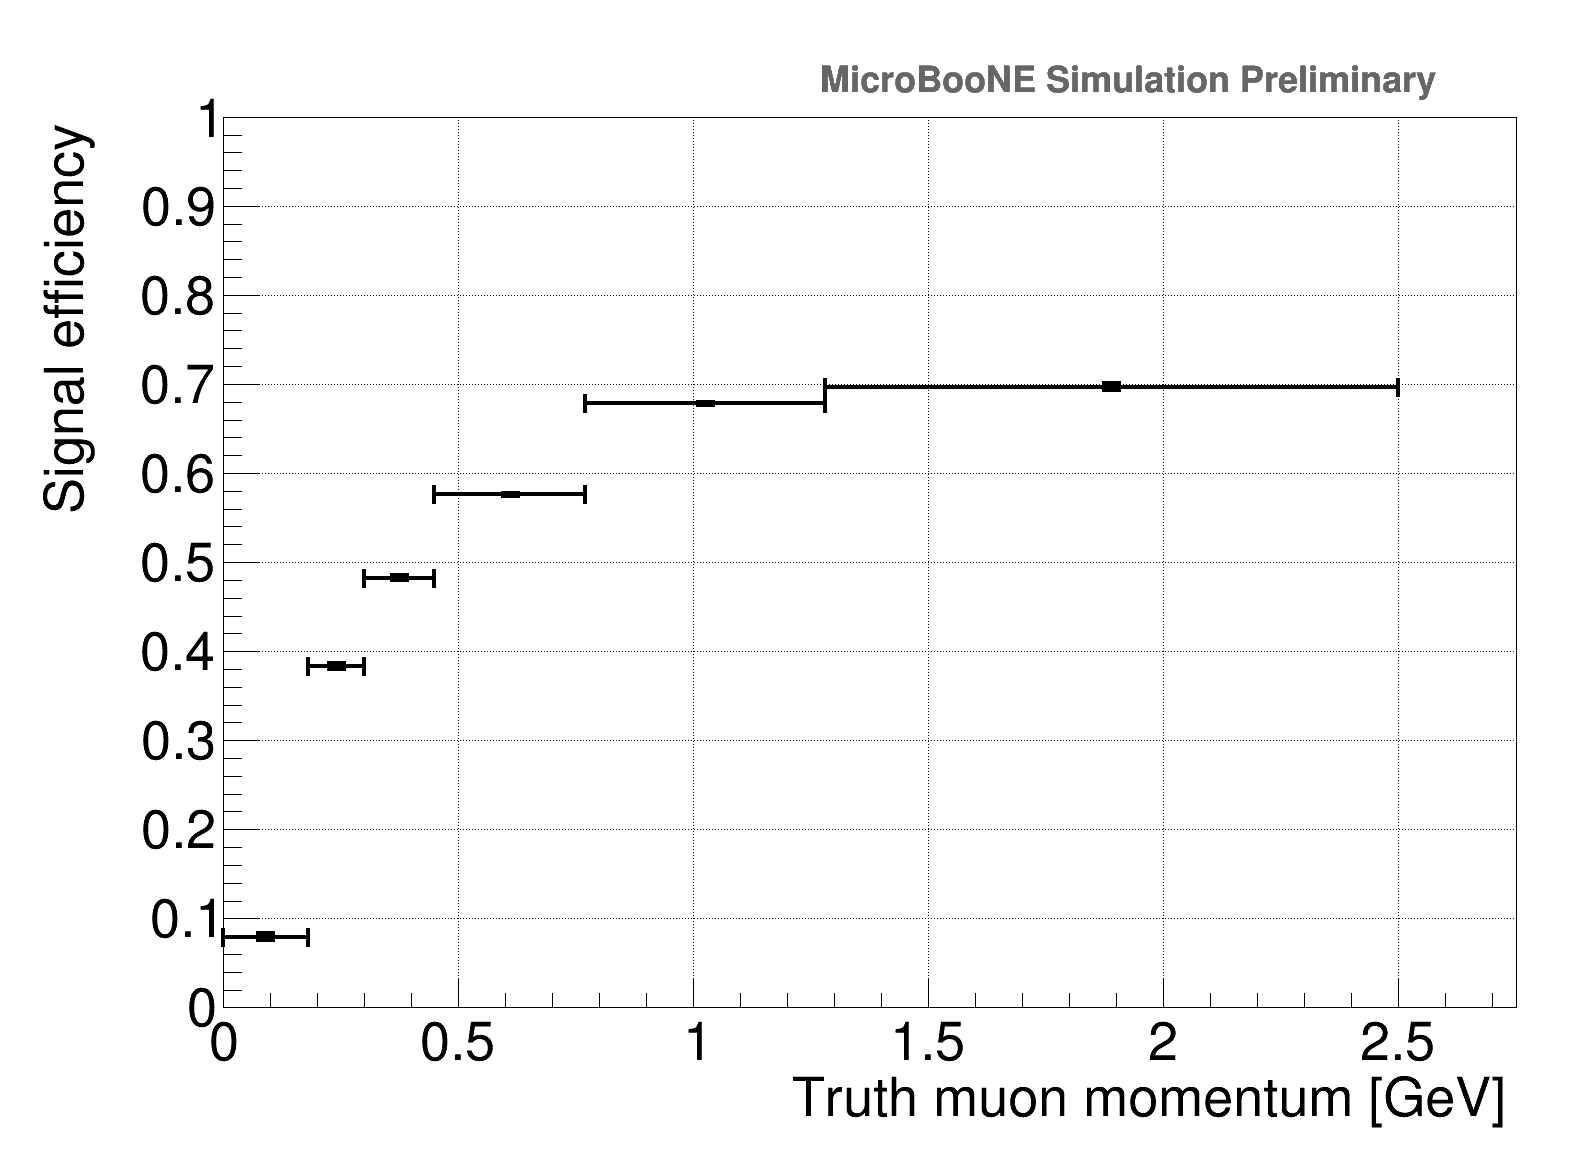

In [101]:
xstart = 0
xend = 2
xbin = 100
weight_name = 'EventWeight*TunedCentralValue_Genie'
title = 'true moum momentum efficiency'
nenner_cut = 'numu_true'
zahler_cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1 && numu_signal'
h_init_eff_energy = ROOT.TH1F("h_init_eff_energy",title,binnum,array('f',mom_bins))
h_init_eff_energy_1 = ROOT.TH1F("h_init_eff_energy_1",title,binnum,array('f',mom_bins))
#h_init_eff_energy = fill_histo(globale.overlay_out,'MCNu_Energy',h_init_eff_energy,zahler_cut)
#h_init_eff_energy_1 = fill_histo(globale.overlay_out,'MCNu_Energy',h_init_eff_energy_1,nenner_cut)
globale.overlay_out.Draw('MCle_Energy>>h_init_eff_energy',weight_name+'*('+zahler_cut+')')
globale.overlay_out.Draw('MCle_Energy>>h_init_eff_energy_1',weight_name+'*('+nenner_cut+')')
eff =  ROOT.TEfficiency(h_init_eff_energy,h_init_eff_energy_1)
eff.SetStatisticOption(ROOT.TEfficiency.kFCP)#;  // to set option for errors (see ref doc)
eff.SetConfidenceLevel(0.68)
eff.SetTitle(title)
eff.Draw("AP")
ROOT.gPad.Update()
graph = eff.GetPaintedGraph()
graph.SetMinimum(0)
graph.SetMaximum(1)
graph.SetLineWidth(2)
graph.GetXaxis().SetTitle("Truth muon momentum [GeV]")
graph.GetYaxis().SetTitle("Signal efficiency")
graph.GetYaxis().SetTitleSize(0.05)
graph.GetYaxis().SetTitleOffset(0.0)
graph.GetYaxis().SetLabelSize(0.05)
graph.GetXaxis().SetTitleSize(0.05)
graph.GetXaxis().SetLabelSize(0.05)
graph.GetXaxis().SetTitleOffset(1)
graph.SetLineColor(ROOT.kBlack)
graph.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(9)
graph.Draw("AP")
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_eff_trueMom.png")
c1.SaveAs(globale.outputdir_root + "h_eff_trueMom.root")
c1.SaveAs(globale.outputdir_pdf + "h_eff_trueMom.pdf")

eff.Write("h_eff_true")
true_eff_arr = np.zeros((binnum))
h_eff_tmp = h_init_eff_energy.Clone()
h_eff_tmp.Divide(h_init_eff_energy_1)
for i in range(1,binnum+1):
    true_eff_arr[i-1] = h_eff_tmp.GetBinContent(i)
print true_eff_arr
np.save('/home/tmettler/Desktop/weighted/xsec_momentum_fakedata/Wes/true_efficiency_momentum',true_eff_arr)

In [102]:
N_sig = h_init_eff_energy.Integral(0,binnum+1)
N_true = h_init_eff_energy_1.Integral(0,binnum+1)
print N_sig/N_true,N_sig,N_true

0.525798802921 158228.574585 300929.887451


185666

Warning in <TFile::Append>: Replacing existing TH1: h_migration (Potential memory leak).
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/root/h2_true_MCS.root has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/png/h2_true_MCS.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/pdf/h2_true_MCS.pdf has been created


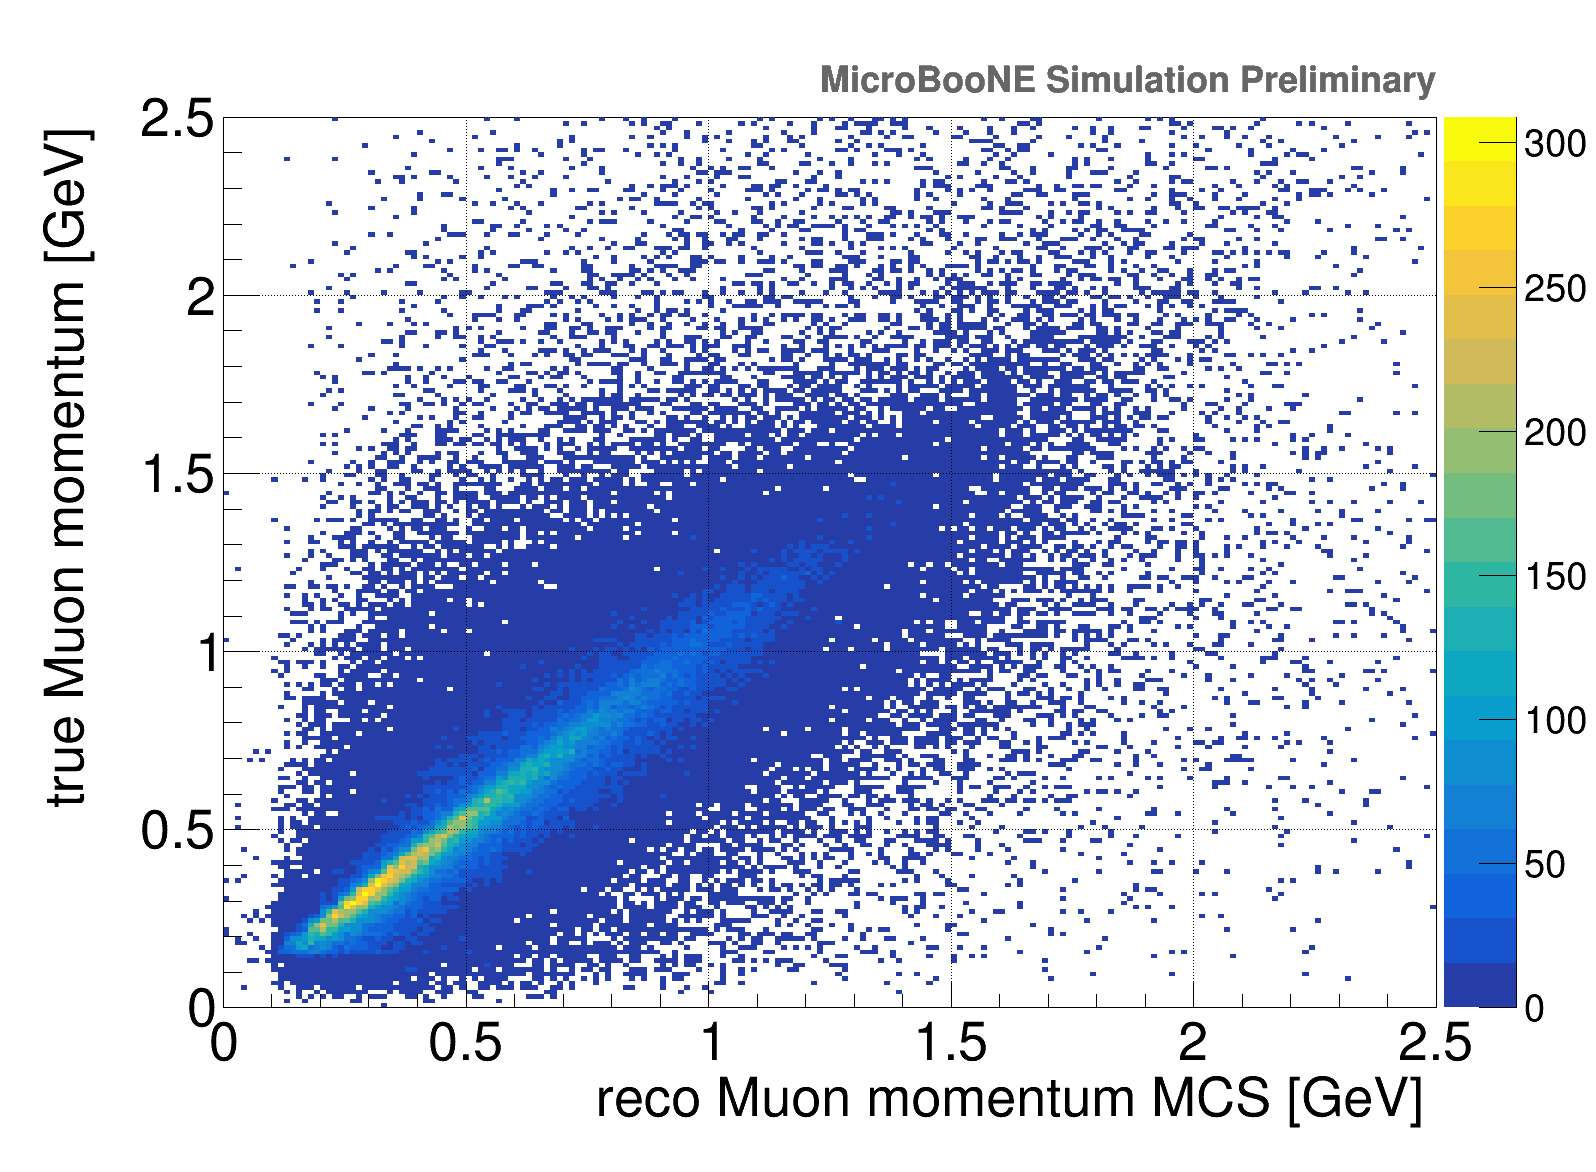

In [103]:
h_migration = ROOT.TH2F("h_migration",'Truth vs. Reco',200,0,2.5,200,0,2.5)
globale.overlay_out.Draw('MCle_Energy:TrackMomMCS_mom'+'>>h_migration',weight_name+'*('+cut+'&& numu_true)','')
h_migration.SetXTitle("reco Muon momentum MCS [GeV]")
h_migration.SetYTitle("true Muon momentum [GeV]")
h_migration.GetYaxis().SetTitleSize(0.05)
h_migration.GetYaxis().SetTitleOffset(0.0)
h_migration.GetYaxis().SetLabelSize(0.05)
h_migration.GetXaxis().SetTitleSize(0.05)
h_migration.GetXaxis().SetLabelSize(0.05)
h_migration.GetXaxis().SetTitleOffset(1)
h_migration.SetLineColor(ROOT.kBlack)
h_migration.SetLineWidth(4)
c1.SetRightMargin(0.1)
h_migration.Draw("colz")
prelim = draw_sim()
prelim.Draw()
#h_migration.Draw("same text")
c1.Draw()
c1.SaveAs(globale.outputdir_root + "h2_true_MCS.root")
c1.SaveAs(globale.outputdir_png + "h2_true_MCS.png")
c1.SaveAs(globale.outputdir_pdf + "h2_true_MCS.pdf")
h_migration.Write("h2_true_MCS_fine")

1239

Warning in <TFile::Append>: Replacing existing TH1: h_migration (Potential memory leak).
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/root/h2_true_MCS_bin.root has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/png/h2_true_MCS_bin.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/pdf/h2_true_MCS_bin.pdf has been created


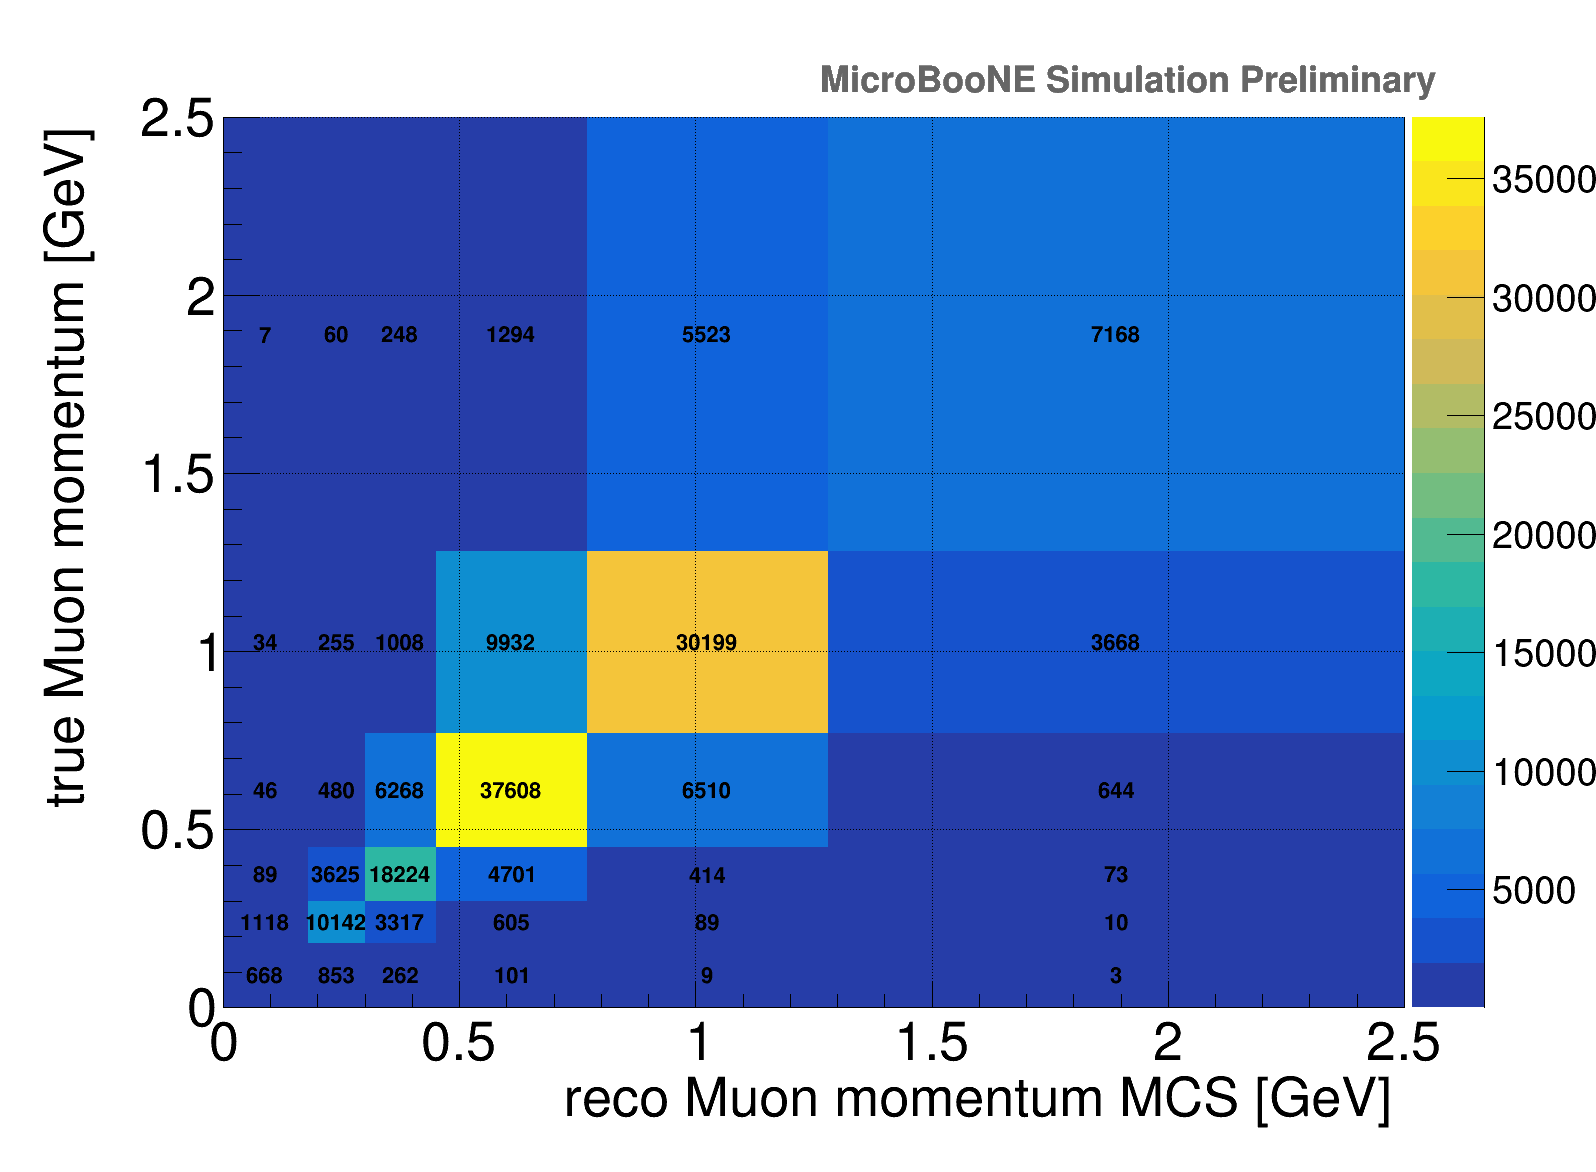

In [104]:
h_migration = ROOT.TH2F("h_migration",'Truth vs. Reco',binnum,array('f',mom_bins),binnum,array('f',mom_bins))
globale.overlay_out.Draw('MCle_Energy:TrackMomMCS_mom'+'>>h_migration',weight_name+'*('+cut+'&& numu_signal)','')
h_migration.SetXTitle("reco Muon momentum MCS [GeV]")
h_migration.SetYTitle("true Muon momentum [GeV]")
h_migration.Draw("colz")
h_migration.Draw("same text")
h_migration.GetYaxis().SetTitleSize(0.05)
h_migration.GetYaxis().SetTitleOffset(0.0)
h_migration.GetYaxis().SetLabelSize(0.05)
h_migration.GetXaxis().SetTitleSize(0.05)
h_migration.GetXaxis().SetLabelSize(0.05)
h_migration.GetXaxis().SetTitleOffset(1)
h_migration.SetLineColor(ROOT.kBlack)
h_migration.SetLineWidth(4)
c1.SetRightMargin(0.12)
ROOT.gStyle.SetPaintTextFormat('0.0f')
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(globale.outputdir_root + "h2_true_MCS_bin.root")
c1.SaveAs(globale.outputdir_png + "h2_true_MCS_bin.png")
c1.SaveAs(globale.outputdir_pdf + "h2_true_MCS_bin.pdf")
h_migration.Write("h2_true_MCS_bin")

[[3.52180656e-01 7.31538623e-02 3.27025282e-03 8.99052064e-04
  7.56072767e-04 4.81619461e-04 0.00000000e+00]
 [4.49429357e-01 6.63660976e-01 1.33502005e-01 9.28948766e-03
  5.62373238e-03 4.13720769e-03 2.98093369e-03]
 [1.38347454e-01 2.17059245e-01 6.71235849e-01 1.21378335e-01
  2.22639183e-02 1.70876627e-02 1.83081425e-02]
 [5.33632110e-02 3.96170416e-02 1.73163504e-01 7.28232380e-01
  2.19422428e-01 8.92776389e-02 8.81612808e-02]
 [4.80569202e-03 5.81173134e-03 1.52382235e-02 1.26062475e-01
  6.67155728e-01 3.81083698e-01 2.31434575e-01]
 [1.34644997e-03 6.31704857e-04 2.68004808e-03 1.24613304e-02
  8.10338863e-02 4.94636372e-01 5.69600561e-01]
 [5.27179558e-04 6.54387589e-05 9.10117542e-04 1.67694054e-03
  3.74423420e-03 1.32958015e-02 8.95145065e-02]]


676

Warning in <TFile::Append>: Replacing existing TH1: h_migration (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/png/h_mitigation_matrix.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/root/h_mitigation_matrix.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/pdf/h_mitigation_matrix.pdf has been created


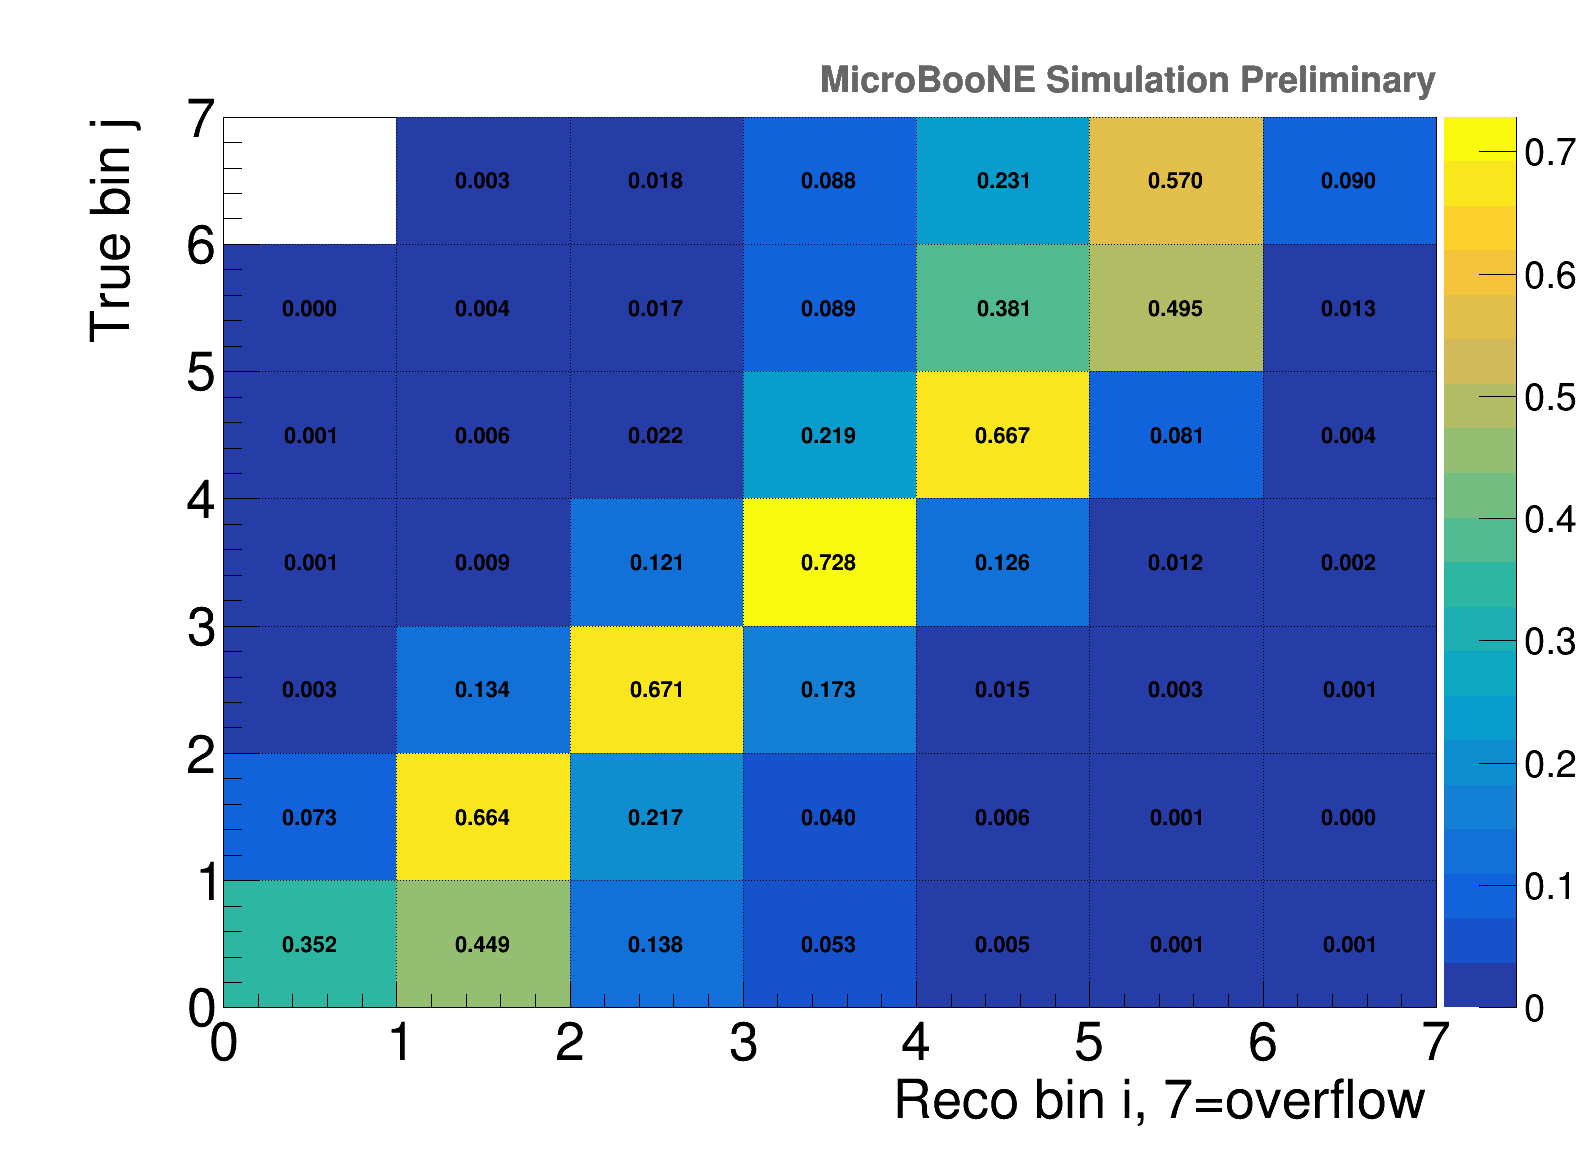

In [105]:
reco_entries = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0,0.0]
mitigation_matrix = np.zeros((7,7))
for j in range(1,binnum+2):
    for i in range(1,binnum+2):
        #print 'bin i,j: ', i,j,'Value: ',h_migration.GetBinContent(i,j)
        reco_entries[j-1]+=h_migration.GetBinContent(i,j)
h_mitigation_matrix = ROOT.TH2F("h_migration",'Migration matrix',7,0,7,7,0,7)
for j in range(1,binnum+2):
    for i in range(1,binnum+2):
        #print 'bin i,j: ', i,j,'Value: ',h_migration.GetBinContent(i,j)
        mitigation_matrix[i-1,j-1]= h_migration.GetBinContent(i,j)/reco_entries[j-1]
        h_mitigation_matrix.SetBinContent(i,j,mitigation_matrix[i-1,j-1])
        #print i-1,j-1,mitigation_matrix[i-1,j-1]
        #true_entries[j]+=h_migration.GetBinContent(i,j)
#mitigation_matrix = mitigation_matrix.transpose()
print mitigation_matrix
np.save(output_filedir+'migration_matrix_momentum',mitigation_matrix)
np.save('/home/tmettler/Desktop/weighted/xsec_momentum_fakedata/Wes/migration_matrix_momentum',mitigation_matrix)
h_mitigation_matrix.SetXTitle("Reco bin i, 7=overflow")
h_mitigation_matrix.SetYTitle("True bin j")
h_mitigation_matrix.Draw('colz')
h_mitigation_matrix.Draw('same text')
h_mitigation_matrix.GetYaxis().SetTitleSize(0.05)
h_mitigation_matrix.GetYaxis().SetTitleOffset(0.0)
h_mitigation_matrix.GetYaxis().SetLabelSize(0.05)
h_mitigation_matrix.GetXaxis().SetTitleSize(0.05)
h_mitigation_matrix.GetXaxis().SetLabelSize(0.05)
h_mitigation_matrix.GetXaxis().SetTitleOffset(1)
h_mitigation_matrix.SetLineColor(ROOT.kBlack)
h_mitigation_matrix.SetLineWidth(4)
c1.SetRightMargin(0.1)
ROOT.gStyle.SetPaintTextFormat('0.3f')
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_mitigation_matrix.png")
c1.SaveAs(globale.outputdir_root + "h_mitigation_matrix.root")
c1.SaveAs(globale.outputdir_pdf + "h_mitigation_matrix.pdf")

h_mitigation_matrix.Write("h_mitigation_matrix")

In [106]:
#print h_mitigation_matrix
h_test_true = [1,0,0,0,0,0,0]
h_test_reco = mitigation_matrix.dot(h_test_true)
print h_test_reco

[0.35218066 0.44942936 0.13834745 0.05336321 0.00480569 0.00134645
 0.00052718]


In [110]:
# Nselected and N generated
title = 'MCS momentum efficiency'
weight_name = 'EventWeight*TunedCentralValue_Genie'
nenner_cut = 'numu_true'
zahler_cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1 && numu_signal'
h_init_eff_energy = ROOT.TH1F("h_init_eff_energy",title,binnum,array('f',mom_bins))
h_init_eff_energy_1 = ROOT.TH1F("h_init_eff_energy_1",title,binnum,array('f',mom_bins))
globale.overlay_out.Draw('MCle_Energy>>h_init_eff_energy',weight_name+'*('+zahler_cut+')')
globale.overlay_out.Draw('MCle_Energy>>h_init_eff_energy_1',weight_name+'*('+nenner_cut+')')

h_init_eff_energy.Write("h_eff_true_energy_z")
h_init_eff_energy_1.Write("h_eff_true_energy_n")

487

Warning in <TFile::Append>: Replacing existing TH1: h_init_eff_energy (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_init_eff_energy (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_init_eff_energy_1 (Potential memory leak).


300929.887451
300186.732178
158228.574585
158939.173218
0.525798802921
0.529467681882


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/png/h_pass_smearing.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/root/h_pass_smearing.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/pdf/h_pass_smearing.pdf has been created


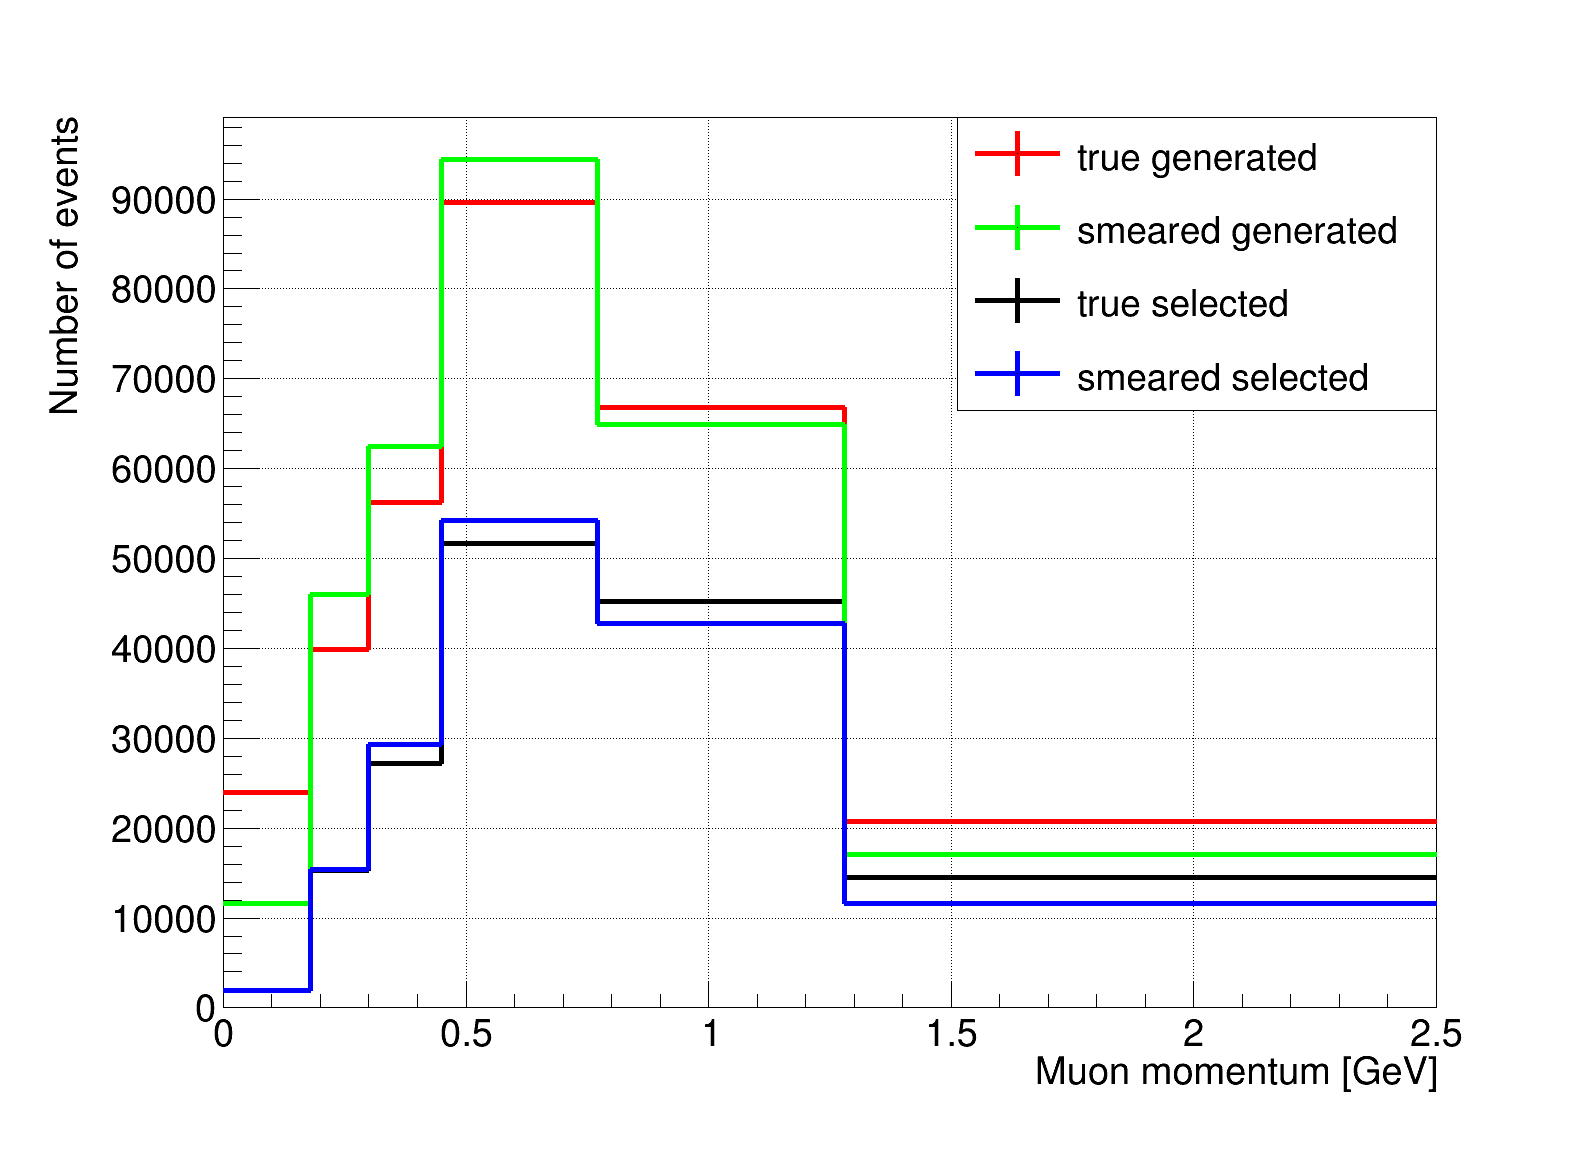

In [111]:
h_init_eff_energy_1.SetLineWidth(5)
h_init_eff_energy_1.SetLineColor(ROOT.kRed)
h_init_eff_energy_1.SetMinimum(0)
h_init_eff_energy.SetLineWidth(5)
h_init_eff_energy.SetLineColor(ROOT.kBlack)


gen_smeared = np.zeros((7))
sel_smeared = np.zeros((7))
for i in range(1,binnum+1):
    gen_smeared[i-1] = h_init_eff_energy_1.GetBinContent(i)
    sel_smeared[i-1] = h_init_eff_energy.GetBinContent(i)
gen_smeared = mitigation_matrix.dot(gen_smeared)
sel_smeared = mitigation_matrix.dot(sel_smeared)

h_init_eff_energy_1_sm = h_init_eff_energy_1.Clone()
h_init_eff_energy_sm = h_init_eff_energy_1.Clone()

for i in range(1,binnum+1):
    h_init_eff_energy_1_sm.SetBinContent(i,gen_smeared[i-1])
    h_init_eff_energy_sm.SetBinContent(i,sel_smeared[i-1])
    
h_init_eff_energy_1_sm.SetLineWidth(5)
h_init_eff_energy_1_sm.SetLineColor(ROOT.kGreen)
h_init_eff_energy_1_sm.SetMinimum(0)
h_init_eff_energy_sm.SetLineWidth(5)
h_init_eff_energy_sm.SetLineColor(ROOT.kBlue)

legend = ROOT.TLegend(0.6,0.65,0.9,0.9)
legend.AddEntry(h_init_eff_energy_1,'true generated',"lep");
legend.AddEntry(h_init_eff_energy_1_sm,'smeared generated',"lep");
legend.AddEntry(h_init_eff_energy,'true selected',"lep");
legend.AddEntry(h_init_eff_energy_sm,'smeared selected',"lep");

h_init_eff_energy_1_sm.SetXTitle("Muon momentum [GeV]")
h_init_eff_energy_1_sm.SetYTitle("Number of events")

h_init_eff_energy_1_sm.Draw('hist')

h_init_eff_energy_1.Draw('same hist')
h_init_eff_energy.Draw('same hist')
h_init_eff_energy_1_sm.Draw('same hist')
h_init_eff_energy_sm.Draw('same hist')
legend.Draw()

print h_init_eff_energy_1.Integral(0,binnum+2)
print h_init_eff_energy_1_sm.Integral(0,binnum+2)

print h_init_eff_energy.Integral(0,binnum+2)
print h_init_eff_energy_sm.Integral(0,binnum+2)

print h_init_eff_energy.Integral(0,binnum+2)/h_init_eff_energy_1.Integral(0,binnum+2)
print h_init_eff_energy_sm.Integral(0,binnum+2)/h_init_eff_energy_1_sm.Integral(0,binnum+2)

c1.Draw()

c1.SaveAs(globale.outputdir_png + "h_pass_smearing.png")
c1.SaveAs(globale.outputdir_root + "h_pass_smearing.root")
c1.SaveAs(globale.outputdir_pdf + "h_pass_smearing.pdf")

In [112]:
# e tilde
N_sel = np.zeros((7))
N_gen = np.zeros((7))
for i in range(1,binnum+2):
    N_sel[i-1] = h_init_eff_energy.GetBinContent(i)
    N_gen[i-1] = h_init_eff_energy_1.GetBinContent(i)
    print N_sel[i-1],N_gen[i-1],N_sel[i-1]/N_gen[i-1]
eff_tilde = np.zeros((6))
eff_tilde = mitigation_matrix.dot(N_sel)/(mitigation_matrix.dot(N_gen))
print eff_tilde
np.save(output_filedir+'eff_tilde_momentum_xsec_CV',eff_tilde)
np.save('/home/tmettler/Desktop/weighted/xsec_momentum_fakedata/Wes/eff_tilde_momentum',eff_tilde)
print output_filedir

1897.8870849609375 23917.890625 0.07935010301356529
15284.4296875 39873.6328125 0.3833217243929798
27156.919921875 56265.5625 0.4826561526311054
51645.1171875 89653.0390625 0.5760553989864922
45269.43359375 66761.640625 0.6780755111760707
14492.2001953125 20789.4296875 0.6970946492113819
2482.5869140625 3668.692138671875 0.6766953508836083
[0.16827187 0.33509144 0.4698891  0.57503418 0.65819969 0.67925527
 0.651143  ]
/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/


In [113]:
h_eff = h_init_eff_energy.Clone()
h_eff.Divide(h_init_eff_energy_1)

True

2.88574153185


461

Warning in <TFile::Append>: Replacing existing TH1: h_eff_tilde (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/png/h_eff_tilde_xsecMom.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/root/h_eff_tilde_xsecMom.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/pdf/h_eff_tilde_xsecMom.pdf has been created


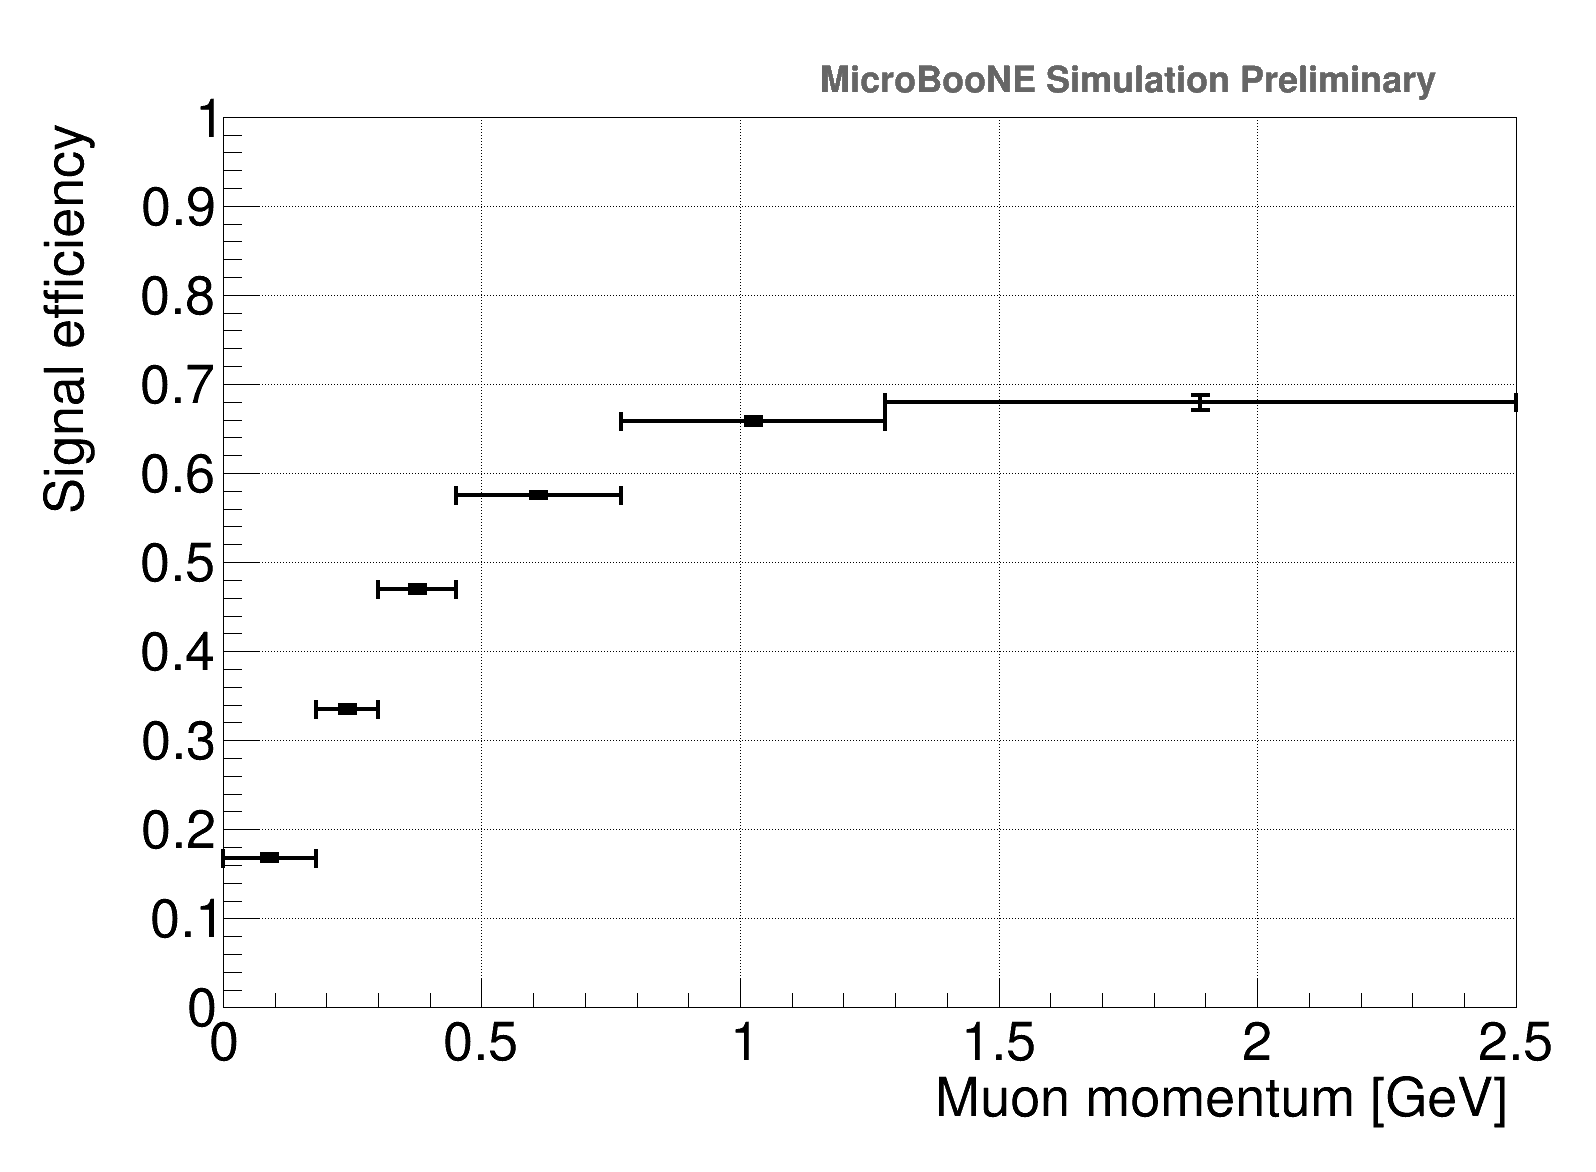

In [114]:
h_eff_tilde = ROOT.TH1F("h_eff_tilde",'Efficiency tilde',binnum,array('f',mom_bins))
for i in range(1,binnum+1):
    h_eff_tilde.SetBinContent(i,eff_tilde[i-1])
    h_eff_tilde.SetBinError(i,h_eff.GetBinError(i))
h_eff_tilde.SetMaximum(1)
h_eff_tilde.SetMinimum(0)
h_eff_tilde.SetLineWidth(3)

h_eff_tilde.SetXTitle("Muon momentum [GeV]")
h_eff_tilde.SetYTitle("Signal efficiency")
h_eff_tilde.GetYaxis().SetTitleSize(0.05)
h_eff_tilde.GetYaxis().SetTitleOffset(0.0)
h_eff_tilde.GetYaxis().SetLabelSize(0.05)
h_eff_tilde.GetXaxis().SetTitleSize(0.05)
h_eff_tilde.GetXaxis().SetLabelSize(0.05)
h_eff_tilde.GetXaxis().SetTitleOffset(1)
h_eff_tilde.SetLineColor(ROOT.kBlack)
h_eff_tilde.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(9)
c1.SetRightMargin(0.05)

h_eff_tilde.Draw('E1')
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_eff_tilde_xsecMom.png")
c1.SaveAs(globale.outputdir_root + "h_eff_tilde_xsecMom.root")
c1.SaveAs(globale.outputdir_pdf + "h_eff_tilde_xsecMom.pdf")
print h_eff_tilde.Integral(0,binnum+2)
h_eff_tilde.Write("h_eff_tilde")

In [29]:
weight_name = 'EventWeight*TunedCentralValue_Genie'
variable = 'TrackMomMCS_mom'
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'

h_data = ROOT.TH1F("h_data",'h_data',binnum,array('f',mom_bins))
#h_ext = ROOT.TH1F("h_ext",'h_ext',binnum,array('f',mom_bins))
#h_dirt = ROOT.TH1F("h_dirt",'h_dirt',binnum,array('f',mom_bins))
h_overlay = ROOT.TH1F("h_overlay",'h_overlay',binnum,array('f',mom_bins))
h_signal = ROOT.TH1F("h_signal",'h_signal',binnum,array('f',mom_bins))
h_mctrue = ROOT.TH1F("h_mctrue",'h_mctrue',binnum,array('f',mom_bins))
#h_weight_func_n = ROOT.TH1F("h_weight_func_n",'h_weight_func',binnum,array('f',mom_bins))

globale.data_out.Draw(variable+'>>h_data',cut,'')
#globale.ext_out.Draw(variable+'>>h_ext',cut,'')
#globale.dirt_out.Draw(variable+'>>h_dirt',weight_name+'*('+cut+')','')
globale.overlay_out.Draw(variable+'>>h_overlay',weight_name+'*('+cut+'&& !numu_signal)','')
globale.overlay_out.Draw(variable+'>>h_signal',weight_name+'*('+cut+'&& numu_signal)','')
#globale.overlay_out.Draw(variable+'>>h_mctrue',weight_name+'*( numu_true)','')

h_true = ROOT.TH1F("h_true",'h_true',binnum,array('f',mom_bins))
globale.overlay_out.Draw(variable+'>>h_true',weight_name+'*(numu_true)','')

246811L

In [30]:
from uncertainties import ufloat
from uncertainties.umath import *  

In [31]:
#lat = np.zeros(8,binnum)
for i in range(1,binnum+1):
    #print 'Entries in bin ',i,'-------------------------------------------------------------'
    n_da = h_data.GetBinContent(i)
    err_da = math.sqrt(n_da)
    #n_ext = h_ext.GetBinContent(i)
    #err_ext = math.sqrt(n_ext)
    #n_dirt = h_dirt.GetBinContent(i)
    #err_dirt = math.sqrt(n_dirt)
    n_ov = h_overlay.GetBinContent(i)
    err_ov = math.sqrt(n_ov)
    n_sig = h_signal.GetBinContent(i)
    err_sig = math.sqrt(n_sig)
    #print 'data: ',n_da, ' +- ',err_da,' Ext: ',n_ext,' +- ',err_ext,\
    #' Dirt: ',n_dirt,' +- ', err_dirt,' Overlay: ',n_ov,' +- ',err_ov,' Signal: ',n_sig,' +- ',err_sig
    #print ''
    print i,' & {0:0.2f}'.format(n_da*scale[data]), ' $\pm$ {0:0.2f}'.format(err_da*scale[data]),\
        ' & {0:0.2f}'.format(n_ov*scale[overlay]),' $\pm$ {0:0.2f}'.format(err_ov*scale[overlay]),\
        ' & {0:0.2f}'.format(n_sig*scale[overlay]),' $\pm$ {0:0.2f}'.format(err_sig*scale[overlay]),\
        #' & {0:0.2f}'.format(n_da - (n_ext*scale[ext]+n_dirt*scale[dirt]+n_ov*scale[overlay])), ' $\pm$ {0:0.2f}'.format( math.sqrt(err_da*err_da + err_ext*err_ext*scale[ext]*scale[ext] + err_dirt*err_dirt*scale[dirt]*scale[dirt] + err_ov*err_ov*scale[overlay]*scale[overlay]))
    
    
    
    #print 'data: {0:0.2f}'.format(n_da*scale[data]), ' +- {0:0.2f}'.format(err_da*scale[data])
    #print ' Ext: {0:0.2f}'.format(n_ext*scale[ext]),' +- {0:0.2f}'.format(err_ext*scale[ext])
    #print' Dirt: {0:0.2f}'.format(n_dirt*scale[dirt]),' +- {0:0.2f}'.format(err_dirt*scale[dirt])
    #print ' Overlay: {0:0.2f}'.format(n_ov*scale[overlay]),' +- {0:0.2f}'.format(err_ov*scale[overlay])
    #print ' Signal: {0:0.2f}'.format(n_sig*scale[overlay]),' +- {0:0.2f}'.format(err_sig*scale[overlay])
    #print 'Total back ground: {0:0.2f}'.format(n_ext*scale[ext]+n_dirt*scale[dirt]+n_ov*scale[overlay]), ' +- {0:0.2f}'.format(math.sqrt(err_ext*err_ext*scale[ext]*scale[ext] + err_dirt*err_dirt*scale[dirt]*scale[dirt] + err_ov*err_ov*scale[overlay]*scale[overlay]))
    #print 'Total data - background: {0:0.2f}'.format(n_da - (n_ext*scale[ext]+n_dirt*scale[dirt]+n_ov*scale[overlay])), ' +- {0:0.2f}'.format( math.sqrt(err_da*err_da + err_ext*err_ext*scale[ext]*scale[ext] + err_dirt*err_dirt*scale[dirt]*scale[dirt] + err_ov*err_ov*scale[overlay]*scale[overlay]))
    #lat[i-1][0]=i
print ''
 

print 'For total cross section'
n_da = h_data.Integral(0,binnum+1)
err_da = math.sqrt(n_da)
#n_ext = h_ext.Integral(0,binnum+1)
#err_ext = math.sqrt(n_ext)
#n_dirt = h_dirt.Integral(0,binnum+1)
#err_dirt = math.sqrt(n_dirt)
n_ov = h_overlay.Integral(0,binnum+1)
err_ov = math.sqrt(n_ov)
n_sig = h_signal.Integral(0,binnum+1)
err_sig = math.sqrt(n_sig)

n_true = h_true.Integral(0,binnum+1)
err_true = math.sqrt(n_true)

data_u = ufloat(n_da, err_da)*scale[data]
#ext_u = ufloat(n_ext, err_ext)*scale[ext]
#dirt_u = ufloat(n_dirt, err_dirt)*scale[dirt]
overlay_u = ufloat(n_ov, err_ov)*scale[overlay]
sig_u = ufloat(n_sig, err_sig)*scale[overlay]
true_u = ufloat(n_true, err_true)*scale[overlay]
eff_u = sig_u/true_u

xsec = (data_u - (overlay_u))/(eff_u*beam_flux*N_tot)# 

print i,' & {0:0.2f}'.format(n_da*scale[data]), ' $\pm$ {0:0.2f}'.format(err_da*scale[data]),\
        ' & {0:0.2f}'.format(n_ov*scale[overlay]),' $\pm$ {0:0.2f}'.format(err_ov*scale[overlay]),\
        ' & {0:0.2f}'.format(n_sig*scale[overlay]),' $\pm$ {0:0.2f}'.format(err_sig*scale[overlay]),\
        #' & {0:0.2f}'.format(n_da - (n_ext*scale[ext]+n_dirt*scale[dirt]+n_ov*scale[overlay])), ' $\pm$ {0:0.2f}'.format( math.sqrt(err_da*err_da + err_ext*err_ext*scale[ext]*scale[ext] + err_dirt*err_dirt*scale[dirt]*scale[dirt] + err_ov*err_ov*scale[overlay]*scale[overlay]))



1  & 1221.00  $\pm$ 34.94  & 612.78  $\pm$ 13.23  & 560.31  $\pm$ 12.65 2  & 7399.00  $\pm$ 86.02  & 2396.50  $\pm$ 26.16  & 4402.94  $\pm$ 35.46 3  & 12467.00  $\pm$ 111.66  & 2619.11  $\pm$ 27.35  & 8386.69  $\pm$ 48.93 4  & 20156.00  $\pm$ 141.97  & 2230.30  $\pm$ 25.24  & 15550.40  $\pm$ 66.63 5  & 15516.00  $\pm$ 124.56  & 1030.05  $\pm$ 17.15  & 12368.69  $\pm$ 59.43 6  & 4638.00  $\pm$ 68.10  & 318.77  $\pm$ 9.54  & 3705.84  $\pm$ 32.53 
For total cross section
6  & 61666.00  $\pm$ 248.33  & 9245.72  $\pm$ 51.38  & 45178.38  $\pm$ 113.58


In [32]:
xsec

9.298058732515208e-39+/-5.344964684844387e-41

In [33]:
print xsec
print 'Result = {:10.3g}'.format(xsec*1e38)

(9.30+/-0.05)e-39
Result =      0.930+/-     0.005


In [34]:

h_data.Sumw2()
#h_ext.Sumw2()
#h_dirt.Sumw2()
h_overlay.Sumw2()
h_data.Scale(globale.scale[globale.data])
#h_ext.Scale(globale.scale[globale.ext])
#h_dirt.Scale(globale.scale[globale.dirt])
h_overlay.Scale(globale.scale[globale.overlay])

h_data.Write("h_data")
#h_ext.Write("h_ext")
#h_dirt.Write("h_dirt")
h_overlay.Write("h_overlay")

441

Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created


In [35]:
data_points = np.zeros((binnum))
mc_bkg_points = np.zeros((binnum))
for i in range(1,binnum+1):
    data_points[i-1] = h_data.GetBinContent(i)
    mc_bkg_points[i-1] = h_overlay.GetBinContent(i)
    #mc_signal_points[i-1] = h_overlay_sig.GetBinContent(i)
print data_points
print mc_bkg_points
#print mc_signal_points
np.save('/home/tmettler/Desktop/weighted/xsec_momentum_fakedata/Wes/data_points_momentum',data_points)
np.save('/home/tmettler/Desktop/weighted/xsec_momentum_fakedata/Wes/mc_bkg_points_momentum',mc_bkg_points)

[ 1221.  7399. 12467. 20156. 15516.  4638.]
[ 612.78393555 2396.50268555 2619.10986328 2230.2956543  1030.046875
  318.76519775]


In [36]:
print h_overlay.GetSumOfWeights()
#h_data.Add(h_ext,-1)
#h_data.Add(h_dirt,-1)
h_data.Add(h_overlay,-1)
print h_data.GetSumOfWeights()

9207.50421143
52189.4968262


In [37]:
h_overlay_sig = ROOT.TH1F("h_overlay_sig",'h_overlay',binnum,array('f',mom_bins))
globale.overlay_out.Draw(variable+'>>h_overlay_sig',weight_name+'*('+cut+'&& numu_signal)','')
h_overlay_sig.Scale(globale.scale[globale.overlay])

h_true = ROOT.TH1F("h_true",'h_true',binnum,array('f',mom_bins))
globale.overlay_out.Draw('MCle_Energy'+'>>h_true',weight_name+'*(numu_true)','')

h_true.Scale(globale.scale[globale.overlay])
h_true.SetLineColor(ROOT.kYellow)
h_true.SetLineWidth(4)

Warning in <TFile::Append>: Replacing existing TH1: h_true (Potential memory leak).


In [38]:
mc_signal_points = np.zeros((binnum))

for i in range(1,binnum+1):
    #data_points[i-1] = h_data.GetBinContent(i)
    #mc_bkg_points[i-1] = h_overlay.GetBinContent(i)
    mc_signal_points[i-1] = h_overlay_sig.GetBinContent(i)
#print data_points
#print mc_bkg_points
print mc_signal_points
#np.save('/home/tmettler/Desktop/weighted/xsec_momentum_fakedata/Wes/data_points',data_points)
np.save('/home/tmettler/Desktop/weighted/xsec_momentum_fakedata/Wes/mc_signal_points_momentum',mc_signal_points)

[  560.30621338  4402.94238281  8386.68945312 15550.39941406
 12368.68457031  3705.84057617]


454

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/png/h_data_bkgsubtracted.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/root/h_data_bkgsubtracted.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/pdf/h_data_bkgsubtracted.pdf has been created


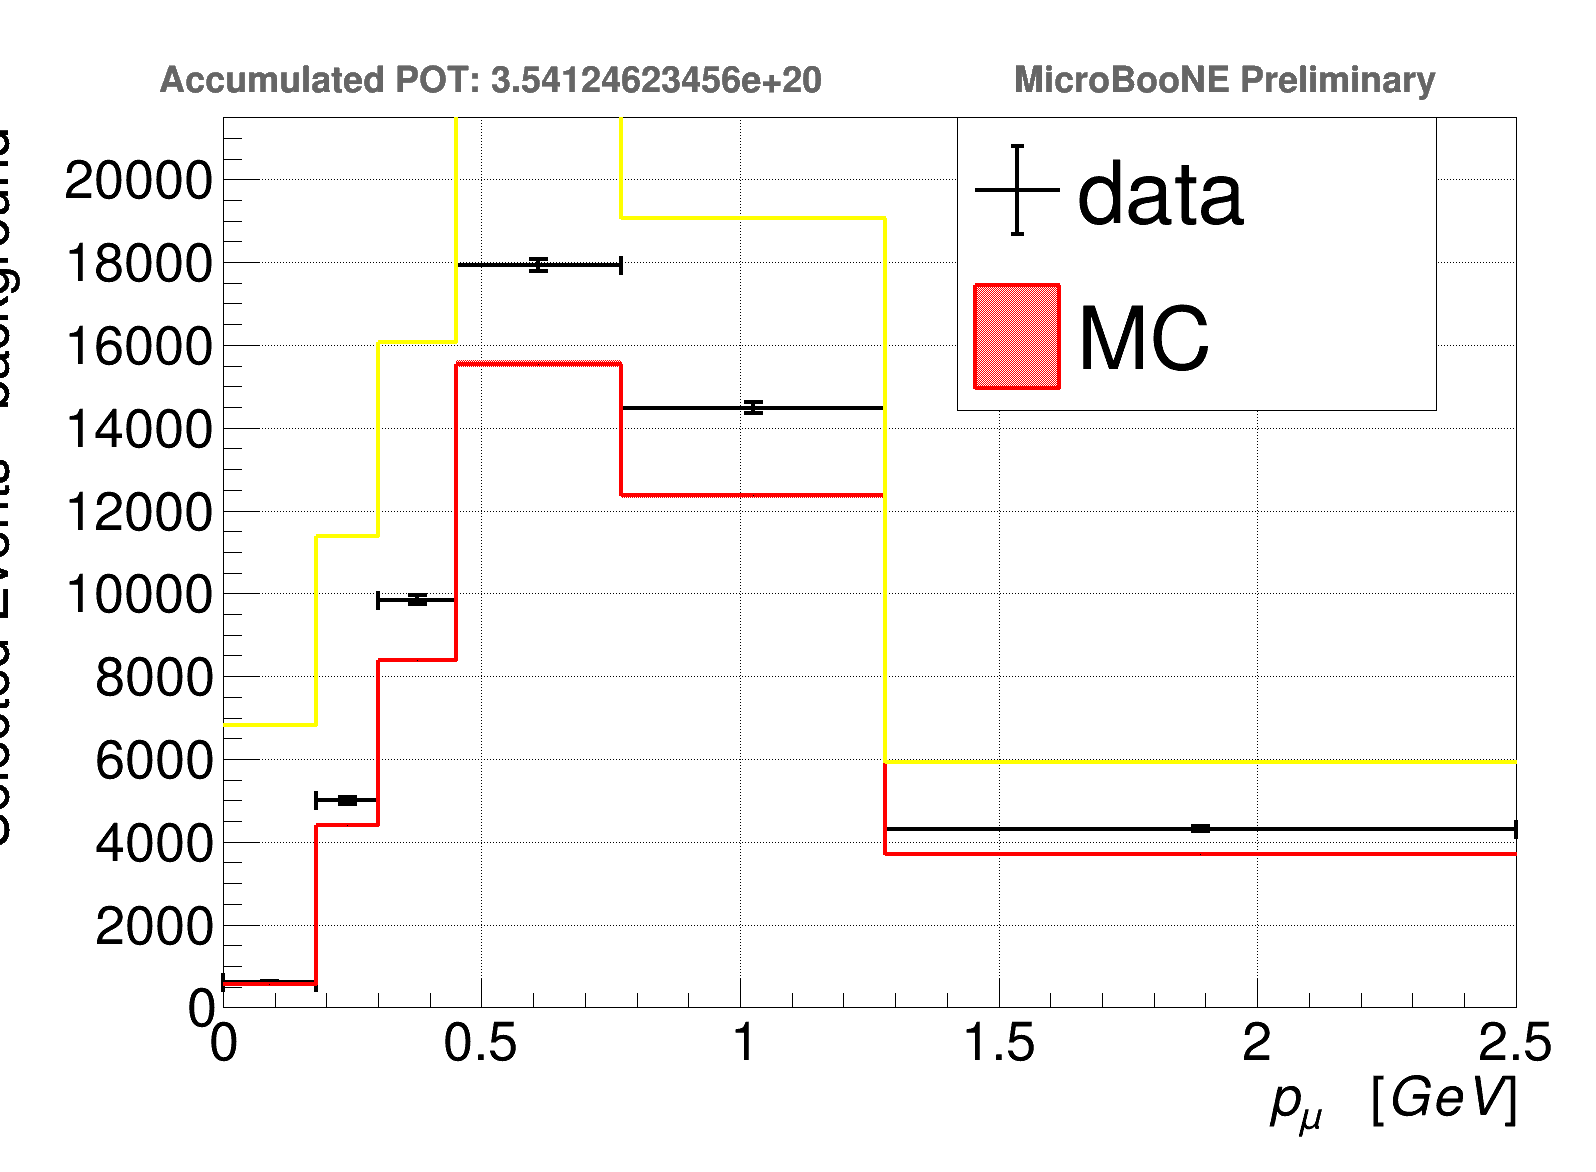

In [39]:
legend = ROOT.TLegend(0.6,0.65,0.9,0.9)
h_overlay_sig.SetLineColor(2)
legend.AddEntry(h_data,'data',"lep");
legend.AddEntry(h_overlay_sig,'MC',"f");
h_data.SetYTitle("Selected Events - background")
h_data.SetXTitle("p_{\mu} \t [GeV]")
h_data.SetLineWidth(3)
h_data.SetMaximum(h_data.GetMaximum()*1.2)

h_data.GetYaxis().SetTitleSize(0.05)
h_data.GetYaxis().SetTitleOffset(0.0)
h_data.GetYaxis().SetLabelSize(0.05)
h_data.GetXaxis().SetTitleSize(0.05)
h_data.GetXaxis().SetLabelSize(0.05)
h_data.GetXaxis().SetTitleOffset(1)
h_data.SetLineColor(ROOT.kBlack)
h_data.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(9)
c1.SetRightMargin(0.05)

h_data.Draw('E1')
h_overlay_sig.SetFillColor(0)
h_overlay_sig.SetLineWidth(4)
#h_overlay_sig.Draw('hist same')
h_overlay_sig.DrawCopy('Hist same')
h_overlay_sig.SetFillColor(2)
h_overlay_sig.SetFillStyle(3001)
h_overlay_sig.Draw('E2 same')
h_true.Draw('hist same')
legend.Draw()
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_data_bkgsubtracted.png")
c1.SaveAs(globale.outputdir_root + "h_data_bkgsubtracted.root")
c1.SaveAs(globale.outputdir_pdf + "h_data_bkgsubtracted.pdf")

h_data.Write("h_data_bkgsubtracted")
h_overlay_sig.Write("h_MC_bkgsubtracted")

In [40]:
for i in range(1,binnum+1):
    h_data.SetBinContent(i,h_data.GetBinContent(i)/h_data.GetBinWidth(i))
    h_overlay_sig.SetBinContent(i,h_overlay_sig.GetBinContent(i)/h_overlay_sig.GetBinWidth(i))
    h_true.SetBinContent(i,h_true.GetBinContent(i)/h_true.GetBinWidth(i))

    h_data.SetBinError(i,h_data.GetBinError(i)/h_data.GetBinWidth(i))
    h_overlay_sig.SetBinError(i,h_overlay_sig.GetBinError(i)/h_overlay_sig.GetBinWidth(i))
    h_true.SetBinError(i,h_true.GetBinError(i)/h_true.GetBinWidth(i))
    
    print h_data.GetBinContent(i)/h_data.GetBinWidth(i)

18772.099406
347395.591664
437684.184151
175055.716803
55693.7855084
2901.9314445


454

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/png/h_data_bkgsubtracted_binwidth.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/root/h_data_bkgsubtracted_binwidth.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/pdf/h_data_bkgsubtracted_binwidth.pdf has been created


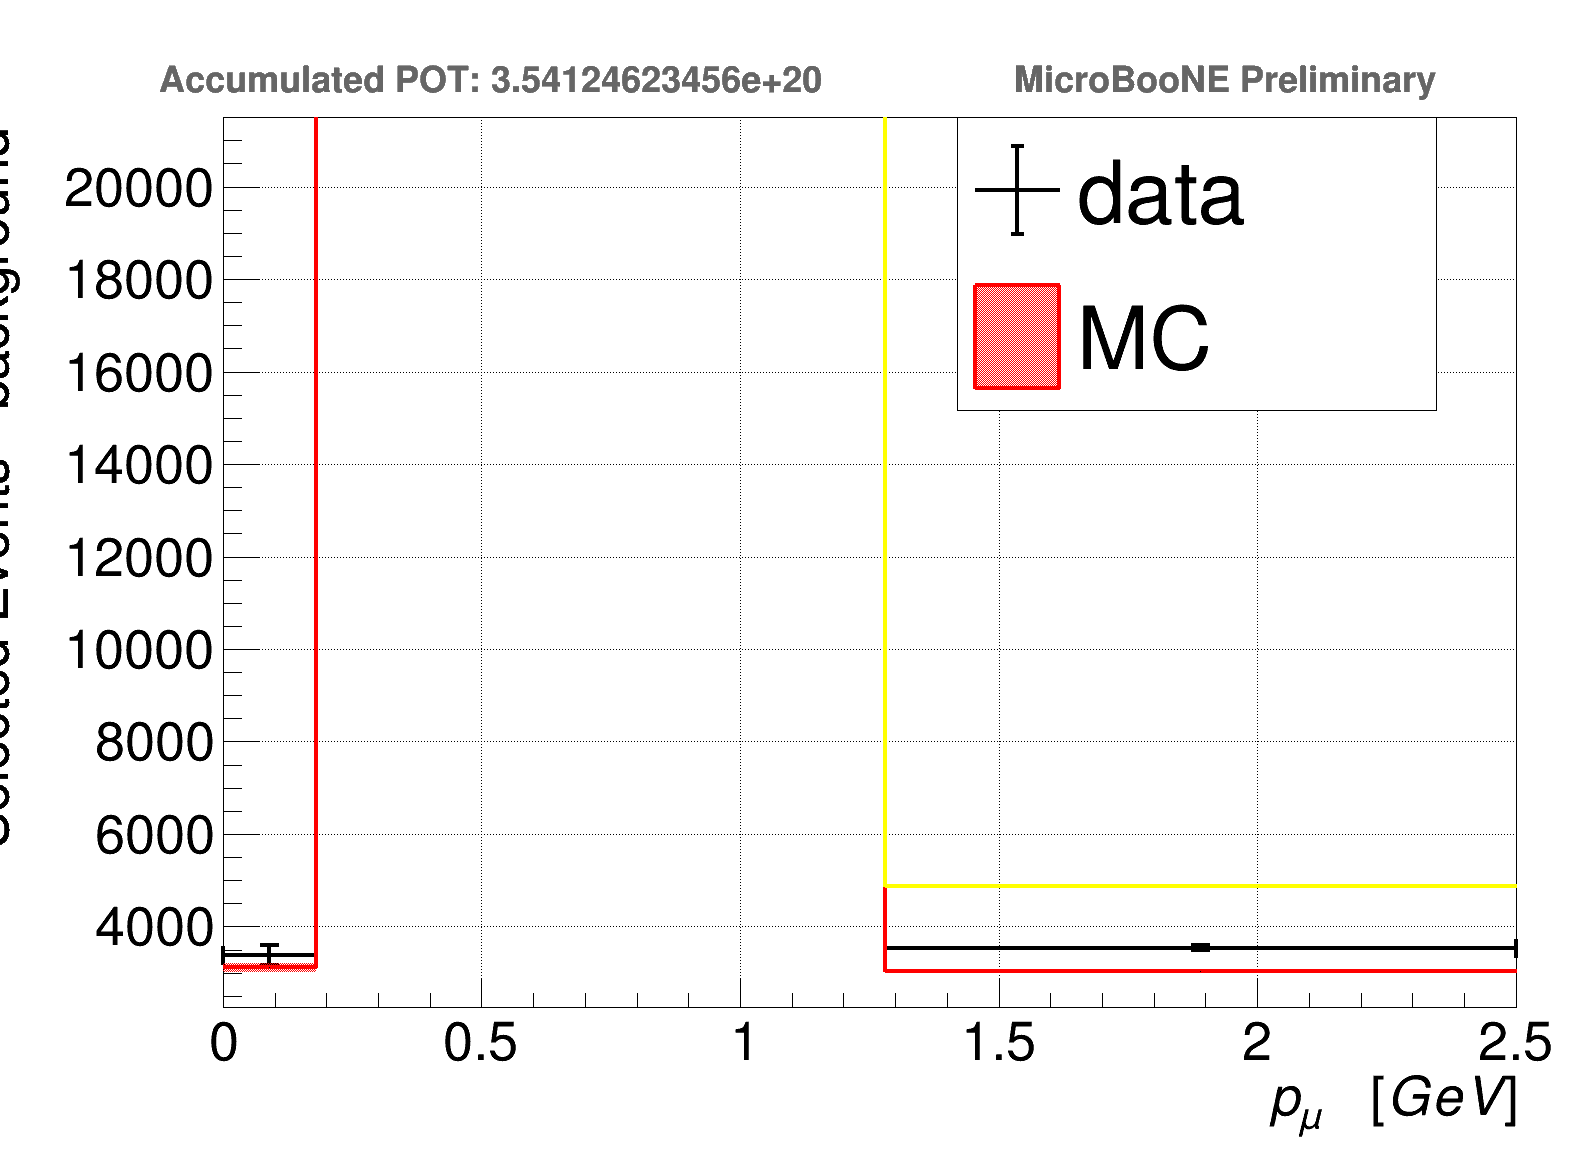

In [41]:
legend = ROOT.TLegend(0.6,0.65,0.9,0.9)
h_overlay_sig.SetLineColor(2)
legend.AddEntry(h_data,'data',"lep");
legend.AddEntry(h_overlay_sig,'MC',"f");
h_data.SetYTitle("Selected Events - background")
h_data.SetXTitle("p_{\mu} \t [GeV]")
h_data.SetLineWidth(3)
#h_data.SetMaximum(h_data.GetMaximum()*1.2)

h_data.GetYaxis().SetTitleSize(0.05)
h_data.GetYaxis().SetTitleOffset(0.0)
h_data.GetYaxis().SetLabelSize(0.05)
h_data.GetXaxis().SetTitleSize(0.05)
h_data.GetXaxis().SetLabelSize(0.05)
h_data.GetXaxis().SetTitleOffset(1)
h_data.SetLineColor(ROOT.kBlack)
h_data.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(9)
c1.SetRightMargin(0.05)

h_data.Draw('E1')
h_overlay_sig.SetFillColor(0)
h_overlay_sig.SetLineWidth(4)
#h_overlay_sig.Draw('hist same')
h_overlay_sig.DrawCopy('Hist same')
h_overlay_sig.SetFillColor(2)
h_overlay_sig.SetFillStyle(3001)
h_overlay_sig.Draw('E2 same')
h_true.Draw('hist same')

legend.Draw()
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_data_bkgsubtracted_binwidth.png")
c1.SaveAs(globale.outputdir_root + "h_data_bkgsubtracted_binwidth.root")
c1.SaveAs(globale.outputdir_pdf + "h_data_bkgsubtracted_binwidth.pdf")

h_data.Write("h_data_bkgsubtracted_binwidth")
h_overlay_sig.Write("h_MC_bkgsubtracted_binwidth")

In [42]:
for i in range(1,binnum+1):
    #print 'Entries in bin ',i,'-------------------------------------------------------------'
    print h_data.GetBinContent(i),h_data.GetBinError(i)

3378.97802734 212.254832519
41687.4726562 757.137527188
65652.6171875 772.232529229
56017.828125 452.607746876
28403.8300781 246.893140825
3540.35644531 56.4337118798


In [43]:
h_data.Divide(h_eff_tilde)
h_data.Scale(1.0/(N_tot*beam_flux*1e-38))

In [44]:
for i in range(1,binnum+1):
    #print 'Entries in bin ',i,'-------------------------------------------------------------'
    print h_data.GetBinContent(i),h_data.GetBinError(i)

0.18727812171 0.0125313485793
1.1602602005 0.0263706876912
1.30307638645 0.0190913793229
0.908543586731 0.00921759102319
0.402469009161 0.00444768815759
0.0486101731658 0.000969296105767


In [45]:
h_overlay_sig.Divide(h_eff_tilde)
h_overlay_sig.Scale(1.0/(N_tot*beam_flux*1e-38))

In [46]:
h_true.Scale(1.0/(N_tot*beam_flux*1e-38))

In [47]:
h_true_smeare = h_true.Clone()
true_bins = np.zeros((binnum+1))
for i in range(1,binnum+2):
    true_bins[i-1] = h_true.GetBinContent(i)
    
true_bins_smeared = np.zeros((binnum+1))

true_bins_smeared = mitigation_matrix.dot(true_bins)

for i in range(1,binnum+1):
    h_true_smeare.SetBinContent(i,true_bins_smeared[i-1])
    print true_bins_smeared[i-1]
h_true_smeare.SetLineColor(ROOT.kGreen)
h_true_smeare.SetLineWidth(4)

0.19356811017335643
0.8887175621657643
1.0107647929698933
0.851610909591073
0.3682317773375452
0.06926702374512078


In [83]:
check_wes = 0.0
for i in range(1,binnum+2):
    #print 'Entries in bin ',i,'-------------------------------------------------------------'
    print h_data.GetBinContent(i),h_data.GetBinError(i)
    check_wes = check_wes+h_data.GetBinContent(i)*h_data.GetBinWidth(i)
print check_wes
# 0.943597549453

0.11790882796 0.00539613063413
0.179284691811 0.00526729539211
0.32455047965 0.00845706936778
0.466044902802 0.0104966465062
0.663810312748 0.0125464579271
0.93781632185 0.0151829259821
1.28879189491 0.0188600830743
1.76161837578 0.0252475051391
2.00878143311 0.0275493686863
0.0 0.0
0.943597549453


427

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/png/h_xsec_corr.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/root/h_xsec_corr.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/pdf/h_xsec_corr.pdf has been created


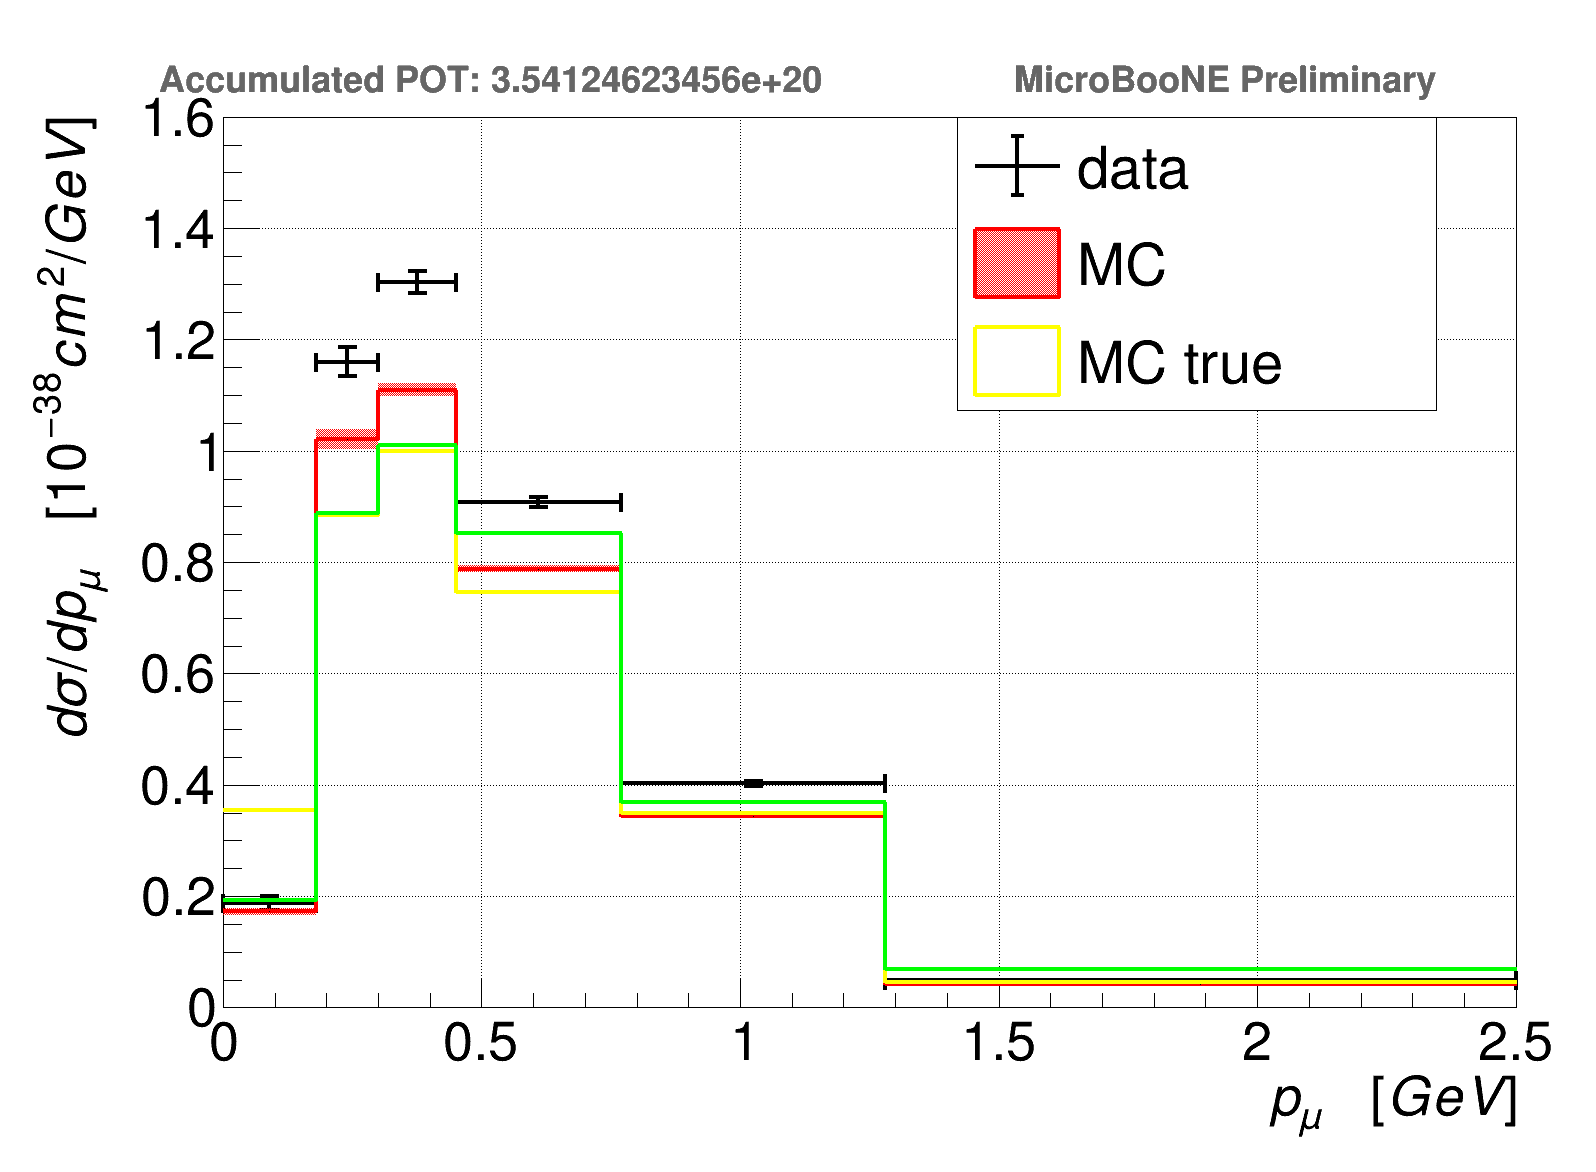

In [49]:
legend = ROOT.TLegend(0.6,0.65,0.9,0.9)
h_overlay_sig.SetLineColor(2)
legend.AddEntry(h_data,'data',"lep");
legend.AddEntry(h_overlay_sig,'MC',"f");
legend.AddEntry(h_true,'MC true',"f");
h_data.SetYTitle("d\sigma / dp_{\mu} \t [10^{-38} cm^{2}/GeV]")
h_data.SetXTitle("p_{\mu} \t [GeV]")
h_data.SetLineWidth(3)
h_data.SetMaximum(1.6)

h_data.GetYaxis().SetTitleSize(0.05)
h_data.GetYaxis().SetTitleOffset(0.0)
h_data.GetYaxis().SetLabelSize(0.05)
h_data.GetXaxis().SetTitleSize(0.05)
h_data.GetXaxis().SetLabelSize(0.05)
h_data.GetXaxis().SetTitleOffset(1)
h_data.SetLineColor(ROOT.kBlack)
h_data.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(9)
c1.SetRightMargin(0.05)

h_data.Draw('E1')
h_overlay_sig.SetFillColor(0)
h_overlay_sig.SetLineWidth(4)
#h_overlay_sig.Draw('hist same')
h_overlay_sig.DrawCopy('Hist same')
h_overlay_sig.SetFillColor(2)
h_overlay_sig.SetFillStyle(3001)
h_overlay_sig.Draw('E2 same')
h_true.Draw('hist same')
h_true_smeare.Draw('hist same')
legend.Draw()
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_xsec_corr.png")
c1.SaveAs(globale.outputdir_root + "h_xsec_corr.root")
c1.SaveAs(globale.outputdir_pdf + "h_xsec_corr.pdf")

h_data.Write("h_xsec_data")
h_overlay_sig.Write("h_xsec_MC")

In [50]:
#asdgweag

In [51]:
# close the root file with all the histos
RootFile.Close()

# Now in cos(theta)

In [123]:
RootFile = ROOT.TFile(output_filedir+"xsec_theta_wighted.root","RECREATE");

In [124]:
mom_bins = [ -1.00, -0.50, 0.00, 0.28, 0.47, 0.63, 0.765, 0.865, 0.935, 1.00 ]
binnum = len(mom_bins) - 1
h_xsec_mom = ROOT.TH1F('h_xsec_mom','h_xsec_mom',binnum,array('f',mom_bins))
np.save('/home/tmettler/Desktop/weighted/xsec_momentum_fakedata/Wes/theta_bins',mom_bins)


[0.27112433 0.2657364  0.31847733 0.41916201 0.49421766 0.56031829
 0.64432913 0.70067185 0.71936941]


Info in <TEfficiency::TEfficiency>: given histograms are filled with weights
Info in <TROOT::TEfficiency::SetUseWeightedEvents>: Histograms are filled with weights
Warning in <TEfficiency::GetEfficiencyErrorLow>: frequentist confidence intervals for weights are only supported by the normal approximation
Info in <TEfficiency::GetEfficiencyErrorLow>: setting statistic option to kFNormal
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/png/h_eff_trueTheta.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/root/h_eff_trueTheta.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/pdf/h_eff_trueTheta.pdf has been created


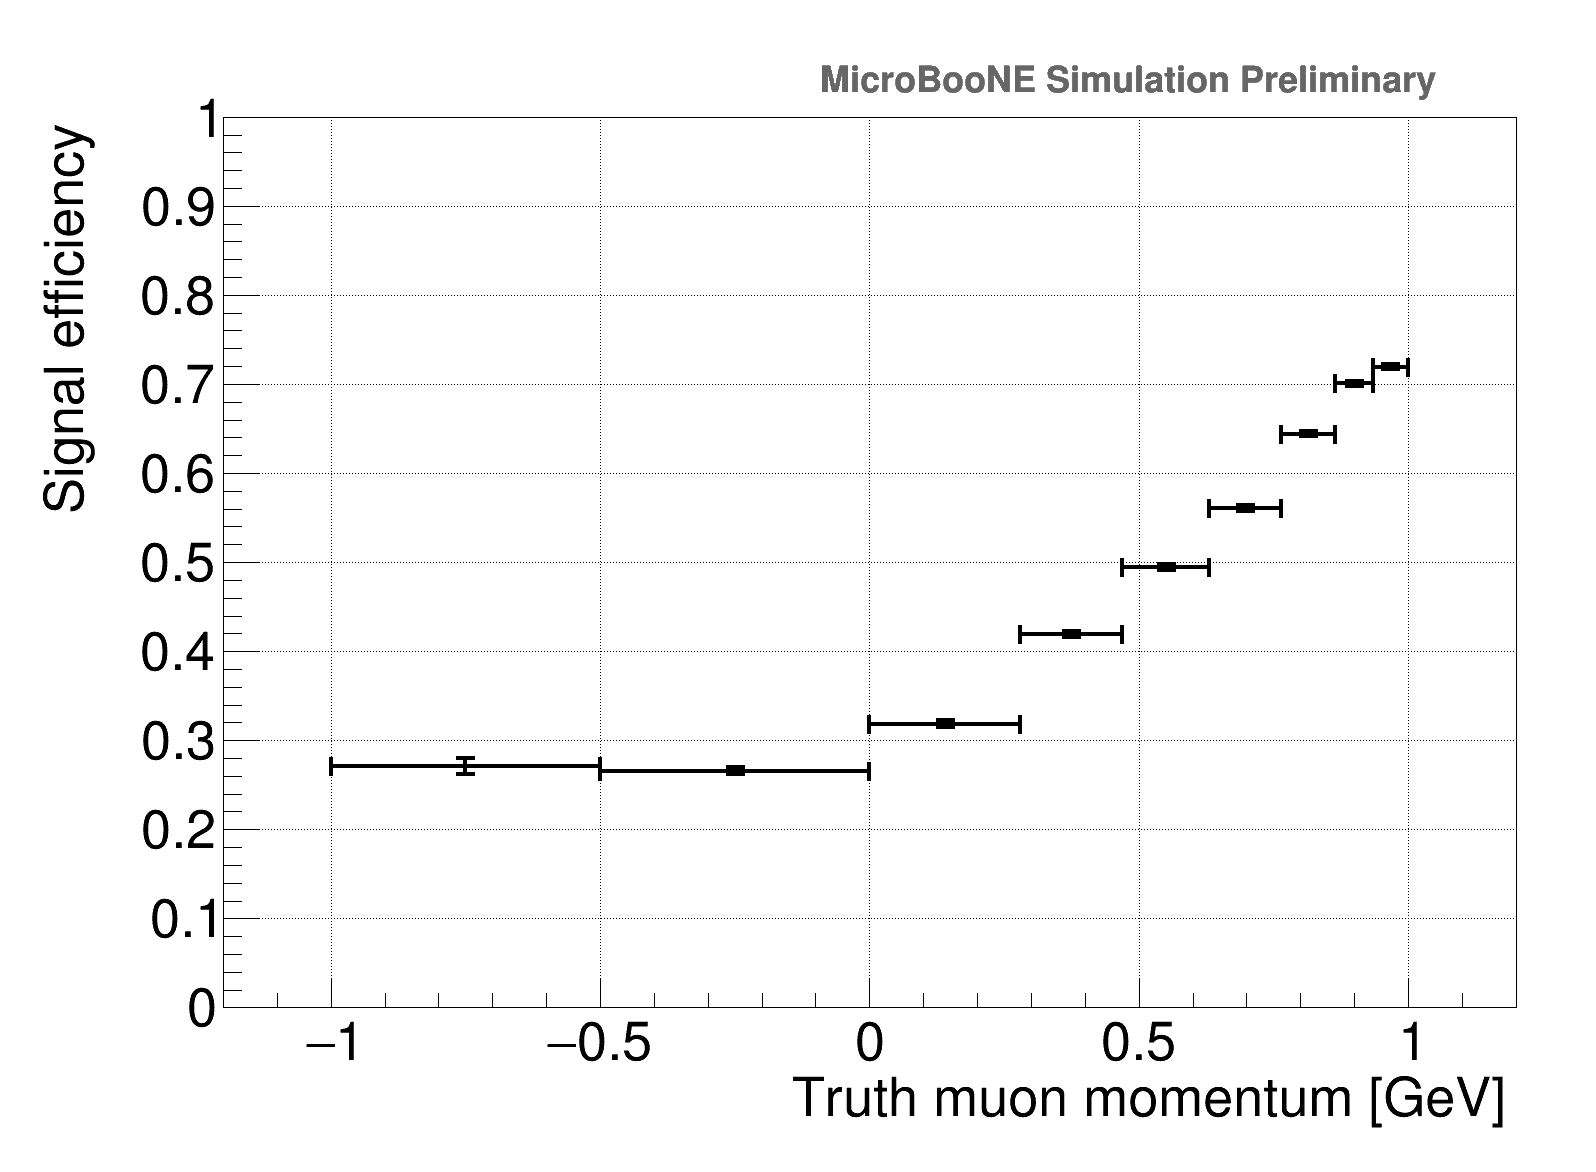

In [125]:
xstart = 0
xend = 2
xbin = 100
weight_name = 'EventWeight*TunedCentralValue_Genie'
title = 'true moum theta efficiency'
nenner_cut = 'numu_true'
zahler_cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1 && numu_signal'
h_init_eff_energy = ROOT.TH1F("h_init_eff_energy",title,binnum,array('f',mom_bins))
h_init_eff_energy_1 = ROOT.TH1F("h_init_eff_energy_1",title,binnum,array('f',mom_bins))
#h_init_eff_energy = fill_histo(globale.overlay_out,'MCNu_Energy',h_init_eff_energy,zahler_cut)
#h_init_eff_energy_1 = fill_histo(globale.overlay_out,'MCNu_Energy',h_init_eff_energy_1,nenner_cut)
globale.overlay_out.Draw('cos(MCNu_leptonTheta)>>h_init_eff_energy',weight_name+'*('+zahler_cut+')')
globale.overlay_out.Draw('cos(MCNu_leptonTheta)>>h_init_eff_energy_1',weight_name+'*('+nenner_cut+')')
eff =  ROOT.TEfficiency(h_init_eff_energy,h_init_eff_energy_1)
eff.SetStatisticOption(ROOT.TEfficiency.kFCP)#;  // to set option for errors (see ref doc)
eff.SetConfidenceLevel(0.68)
eff.SetTitle(title)
eff.Draw("AP")
ROOT.gPad.Update()
graph = eff.GetPaintedGraph()
graph.SetMinimum(0)
graph.SetMaximum(1)
graph.SetLineWidth(2)
graph.GetXaxis().SetTitle("Truth muon momentum [GeV]")
graph.GetYaxis().SetTitle("Signal efficiency")
graph.GetYaxis().SetTitleSize(0.05)
graph.GetYaxis().SetTitleOffset(0.0)
graph.GetYaxis().SetLabelSize(0.05)
graph.GetXaxis().SetTitleSize(0.05)
graph.GetXaxis().SetLabelSize(0.05)
graph.GetXaxis().SetTitleOffset(1)
graph.SetLineColor(ROOT.kBlack)
graph.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(9)
graph.Draw("AP")
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_eff_trueTheta.png")
c1.SaveAs(globale.outputdir_root + "h_eff_trueTheta.root")
c1.SaveAs(globale.outputdir_pdf + "h_eff_trueTheta.pdf")

eff.Write("h_eff_true")
true_eff_arr = np.zeros((binnum))
h_eff_tmp = h_init_eff_energy.Clone()
h_eff_tmp.Divide(h_init_eff_energy_1)
for i in range(1,binnum+1):
    true_eff_arr[i-1] = h_eff_tmp.GetBinContent(i)
print true_eff_arr
np.save('/home/tmettler/Desktop/weighted/xsec_momentum_fakedata/Wes/true_efficiency_theta',true_eff_arr)

136820

Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/root/h2_true_costheta.root has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/png/h2_true_costheta.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/pdf/h2_true_costheta.pdf has been created


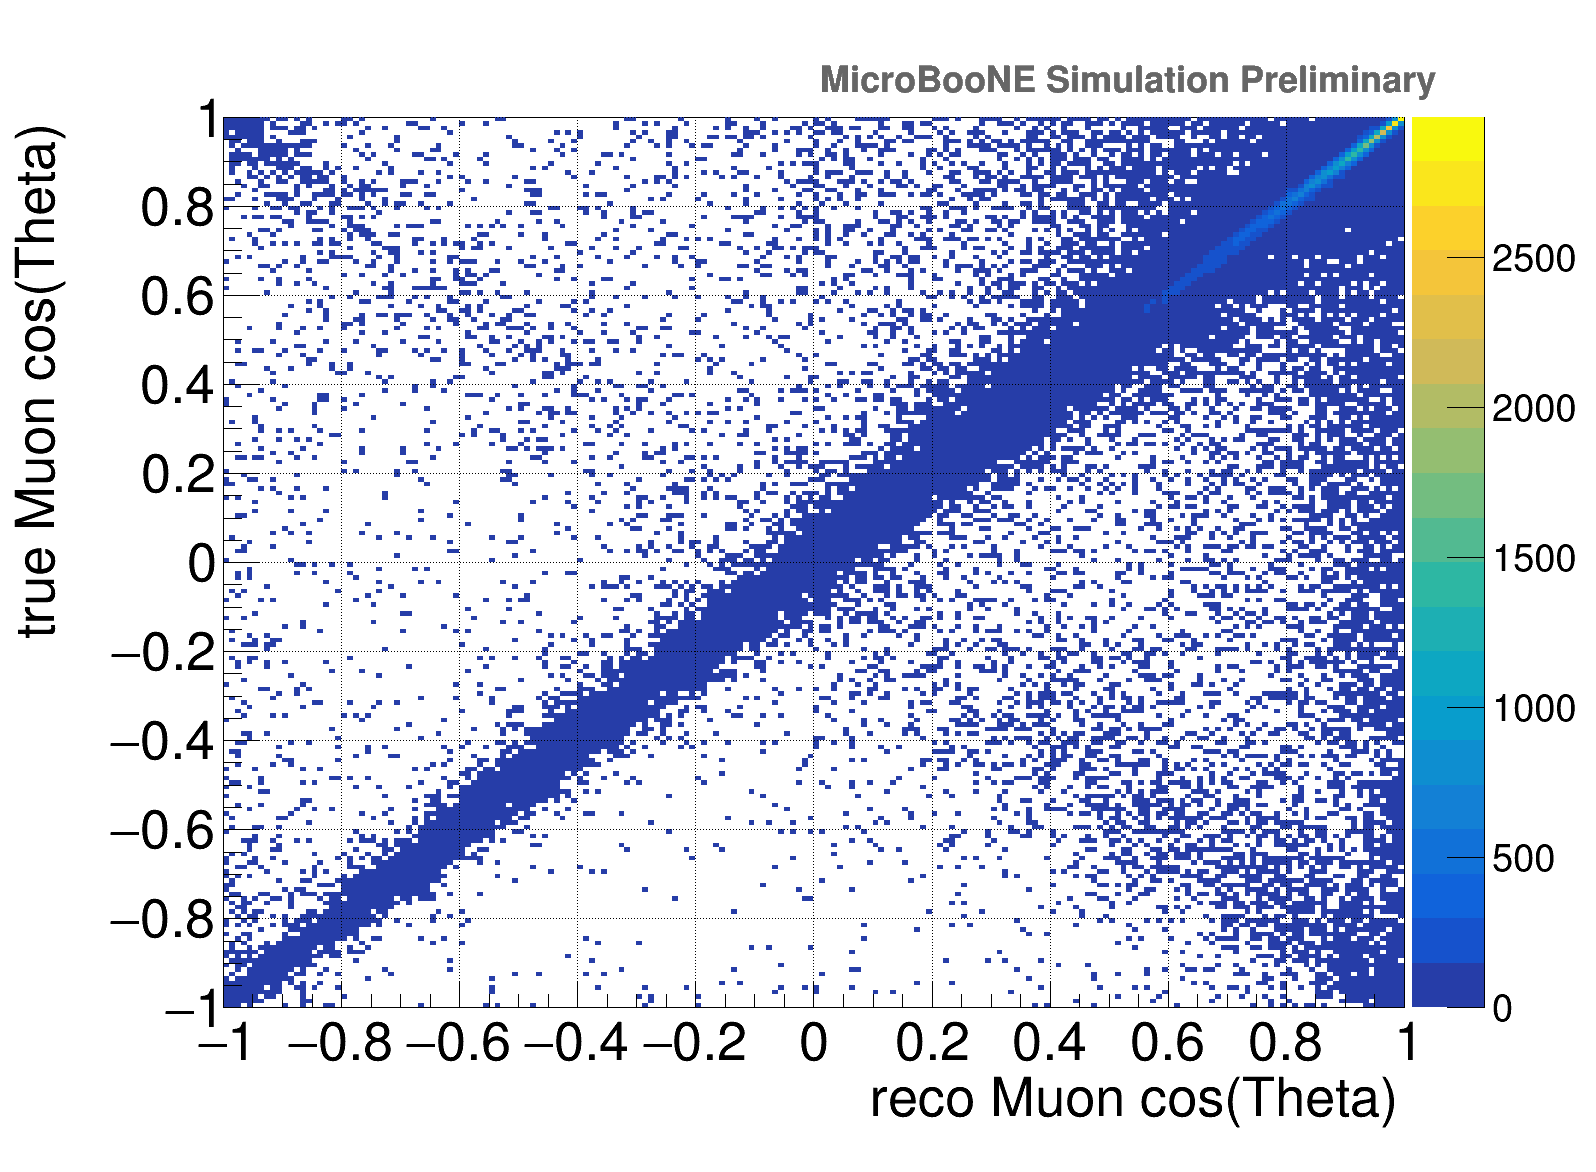

In [126]:
h_migration = ROOT.TH2F("h_migration",'Truth vs. Reco',200,-1,1,200,-1,1)
globale.overlay_out.Draw('cos(MCNu_leptonTheta):cos(TrackTheta)'+'>>h_migration',weight_name+'*('+cut+'&& numu_true)','')
h_migration.SetXTitle("reco Muon cos(Theta)")
h_migration.SetYTitle("true Muon cos(Theta)")
h_migration.GetYaxis().SetTitleSize(0.05)
h_migration.GetYaxis().SetTitleOffset(0.0)
h_migration.GetYaxis().SetLabelSize(0.05)
h_migration.GetXaxis().SetTitleSize(0.05)
h_migration.GetXaxis().SetLabelSize(0.05)
h_migration.GetXaxis().SetTitleOffset(1)
h_migration.SetLineColor(ROOT.kBlack)
h_migration.SetLineWidth(4)
c1.SetRightMargin(0.12)
h_migration.Draw("colz")
prelim = draw_sim()
prelim.Draw()
#h_migration.Draw("same text")
c1.Draw()
c1.SaveAs(globale.outputdir_root + "h2_true_costheta.root")
c1.SaveAs(globale.outputdir_png + "h2_true_costheta.png")
c1.SaveAs(globale.outputdir_pdf + "h2_true_costheta.pdf")

h_migration.Write("h2_true_theta_fine")

1648

Warning in <TFile::Append>: Replacing existing TH1: h_migration (Potential memory leak).
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/root/h2_true_Theta_bin.root has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/png/h2_true_Theta_bin.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/pdf/h2_true_Theta_bin.pdf has been created


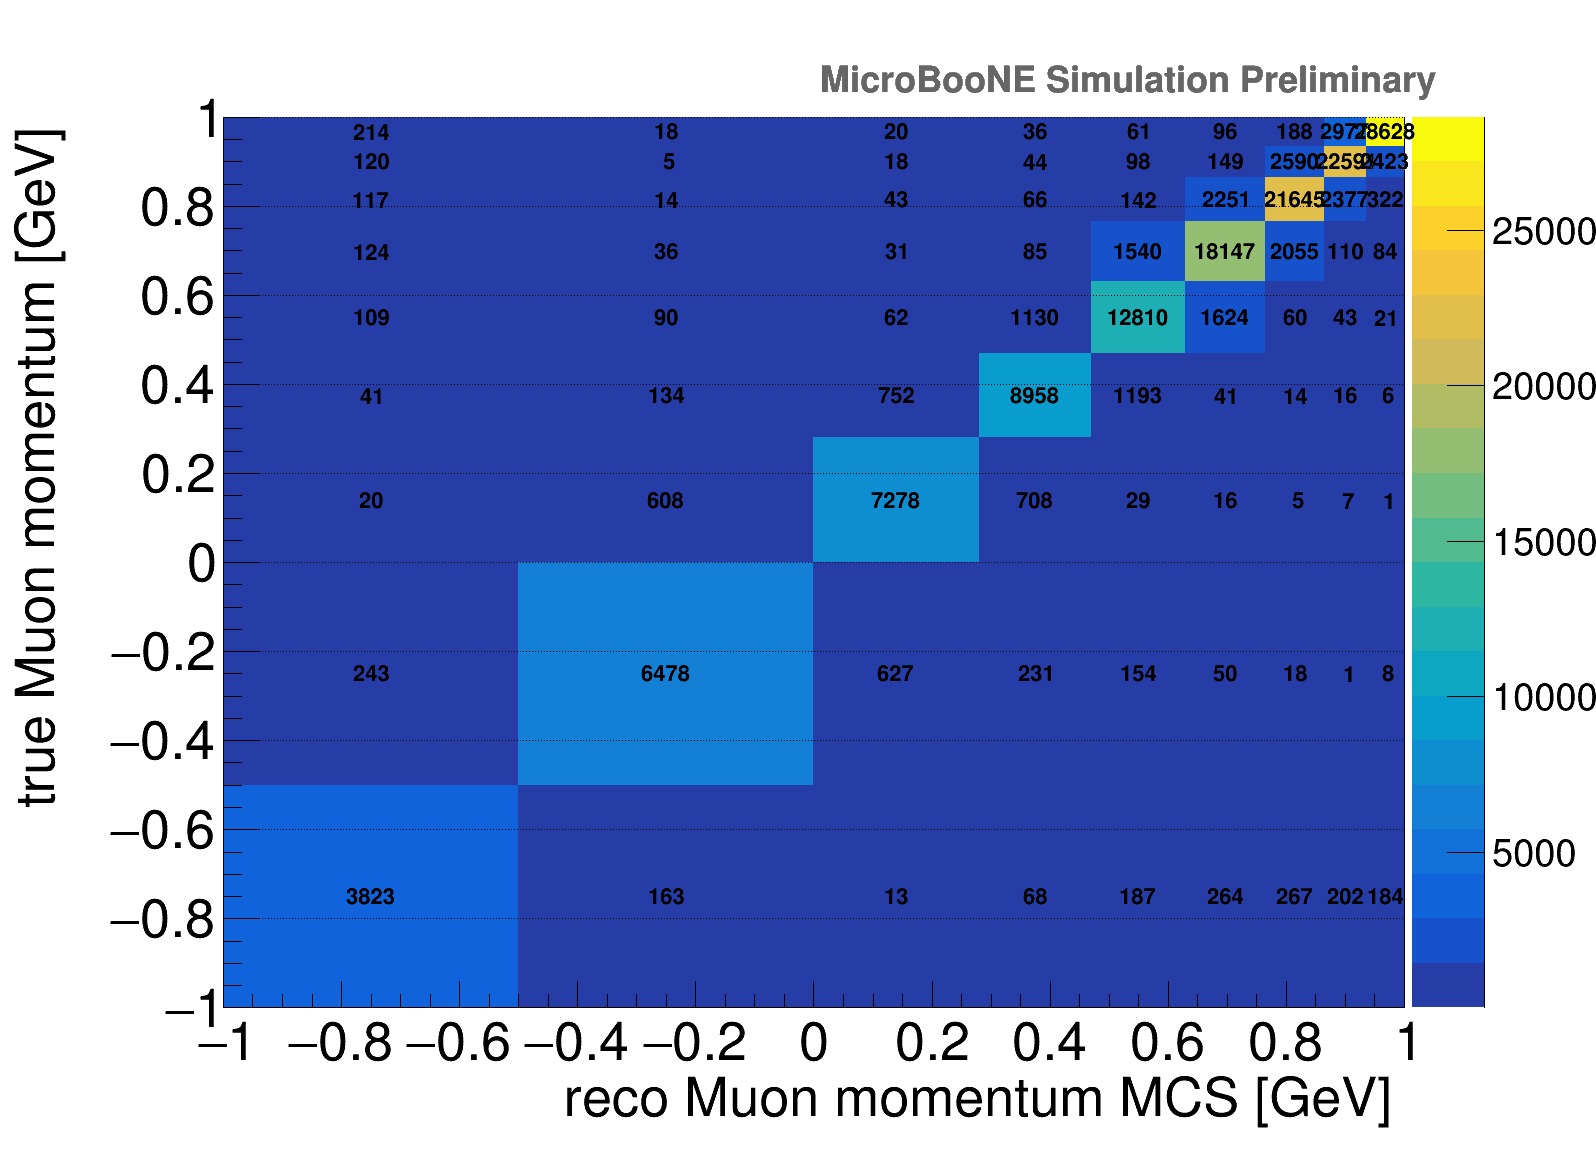

In [127]:
h_migration = ROOT.TH2F("h_migration",'Truth vs. Reco',binnum,array('f',mom_bins),binnum,array('f',mom_bins))
globale.overlay_out.Draw('cos(MCNu_leptonTheta):cos(TrackTheta)'+'>>h_migration',weight_name+'*('+cut+'&& numu_signal)','')
h_migration.SetXTitle("reco Muon momentum MCS [GeV]")
h_migration.SetYTitle("true Muon momentum [GeV]")
h_migration.GetYaxis().SetTitleSize(0.05)
h_migration.GetYaxis().SetTitleOffset(0.0)
h_migration.GetYaxis().SetLabelSize(0.05)
h_migration.GetXaxis().SetTitleSize(0.05)
h_migration.GetXaxis().SetLabelSize(0.05)
h_migration.GetXaxis().SetTitleOffset(1)
h_migration.SetLineColor(ROOT.kBlack)
h_migration.SetLineWidth(4)
c1.SetRightMargin(0.12)
ROOT.gStyle.SetPaintTextFormat("2.0f");
h_migration.Draw("colz")
h_migration.Draw("same text")
c1.SetGrid(0)
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(globale.outputdir_root + "h2_true_Theta_bin.root")
c1.SaveAs(globale.outputdir_png + "h2_true_Theta_bin.png")
c1.SaveAs(globale.outputdir_pdf + "h2_true_Theta_bin.pdf")

h_migration.Write("h2_true_theta_bin")

[1. 1. 1. 1. 1. 1. 1. 1. 1.]
9.0
[0.80405934 0.95160889 0.99758852 1.00738865 1.04929155 1.07346277
 1.05259302 1.03526913 1.02873811]


853

Warning in <TFile::Append>: Replacing existing TH1: h_migration (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/png/h_mitigation_matrix_theta.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/root/h_mitigation_matrix_theta.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/pdf/h_mitigation_matrix_theta.pdf has been created


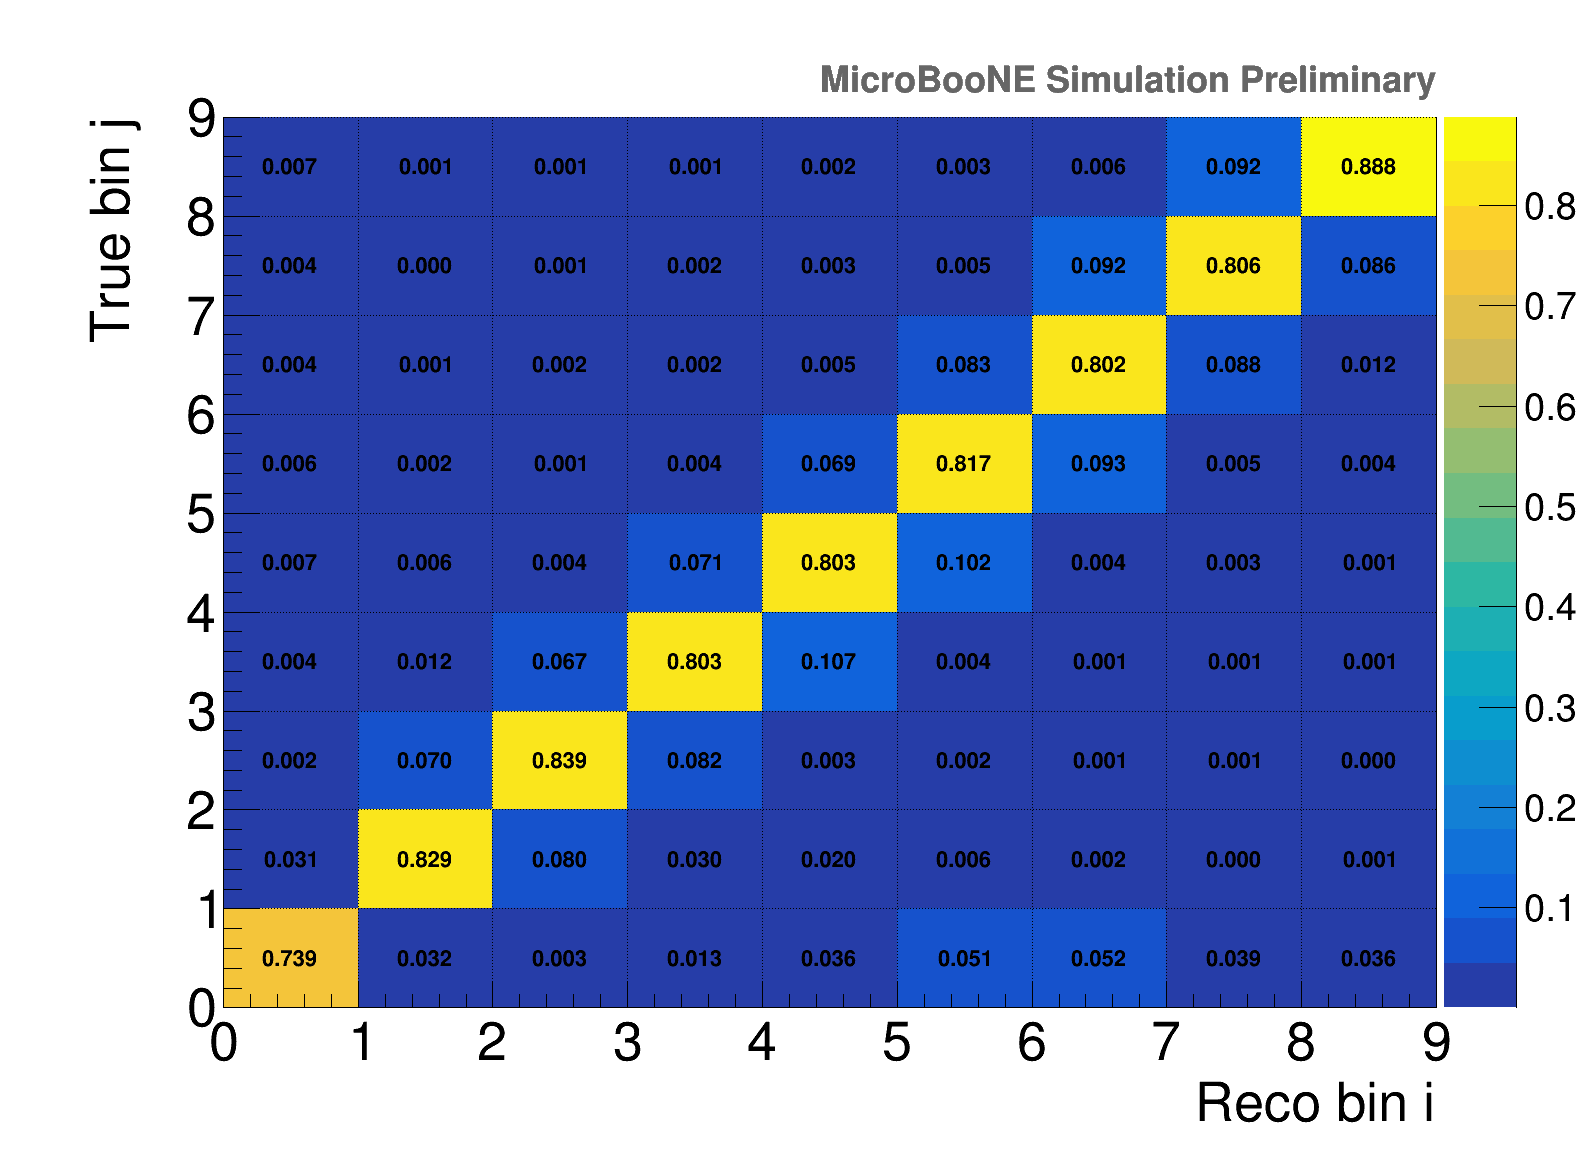

In [128]:
reco_entries = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
ROOT.gStyle.SetPaintTextFormat("2.3f");
mitigation_matrix = np.zeros((9,9))
for j in range(1,binnum+1):
    for i in range(1,binnum+1):
        #print 'bin i,j: ', i,j,'Value: ',h_migration.GetBinContent(i,j)
        reco_entries[j-1]+=h_migration.GetBinContent(i,j)
h_mitigation_matrix = ROOT.TH2F("h_migration",'Migration matrix',9,0,9,9,0,9)
for j in range(1,binnum+1):
    for i in range(1,binnum+1):
        #print 'bin i,j: ', i,j,'Value: ',h_migration.GetBinContent(i,j)
        mitigation_matrix[i-1,j-1]= h_migration.GetBinContent(i,j)/reco_entries[j-1]
        h_mitigation_matrix.SetBinContent(i,j,mitigation_matrix[i-1,j-1])
        #print i-1,j-1,mitigation_matrix[i-1,j-1]
        #true_entries[j]+=h_migration.GetBinContent(i,j)
print mitigation_matrix.sum(axis=0)
print mitigation_matrix.sum(axis=1).sum()
print mitigation_matrix.sum(axis=1)
#mitigation_matrix = mitigation_matrix.transpose()
#print mitigation_matrix
np.save(output_filedir+'migration_matrix_theta',mitigation_matrix)
np.save('/home/tmettler/Desktop/weighted/xsec_momentum_fakedata/Wes/migration_matrix_theta',mitigation_matrix)

h_mitigation_matrix.SetXTitle("Reco bin i")
h_mitigation_matrix.SetYTitle("True bin j")
h_mitigation_matrix.Draw('colz')
h_mitigation_matrix.Draw('same text')
h_mitigation_matrix.GetYaxis().SetTitleSize(0.05)
h_mitigation_matrix.GetYaxis().SetTitleOffset(0.0)
h_mitigation_matrix.GetYaxis().SetLabelSize(0.05)
h_mitigation_matrix.GetXaxis().SetTitleSize(0.05)
h_mitigation_matrix.GetXaxis().SetLabelSize(0.05)
h_mitigation_matrix.GetXaxis().SetTitleOffset(1)
h_mitigation_matrix.SetLineColor(ROOT.kBlack)
h_mitigation_matrix.SetLineWidth(4)
c1.SetRightMargin(0.1)
ROOT.gStyle.SetPaintTextFormat('0.3f')
prelim = draw_sim()
prelim.Draw()
c1.SetGrid(1)
c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_mitigation_matrix_theta.png")
c1.SaveAs(globale.outputdir_root + "h_mitigation_matrix_theta.root")
c1.SaveAs(globale.outputdir_pdf + "h_mitigation_matrix_theta.pdf")

h_mitigation_matrix.Write("h_mitigation_matrix_theta")

In [129]:
# Nselected and N generated
title = 'MCS momentum efficiency'
weight_name = 'EventWeight*TunedCentralValue_Genie'
nenner_cut = 'numu_true'
zahler_cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1 && numu_signal'
h_init_eff_energy = ROOT.TH1F("h_init_eff_energy",title,binnum,array('f',mom_bins))
h_init_eff_energy_1 = ROOT.TH1F("h_init_eff_energy_1",title,binnum,array('f',mom_bins))
globale.overlay_out.Draw('cos(MCNu_leptonTheta)>>h_init_eff_energy',weight_name+'*('+zahler_cut+')')
globale.overlay_out.Draw('cos(MCNu_leptonTheta)>>h_init_eff_energy_1',weight_name+'*('+nenner_cut+')')
h_init_eff_energy.Write("h_eff_true_theta_z")
h_init_eff_energy_1.Write("h_eff_true_theta_n")

533

Warning in <TFile::Append>: Replacing existing TH1: h_init_eff_energy (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_init_eff_energy (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_init_eff_energy_1 (Potential memory leak).


In [130]:
# e tilde
N_sel = np.zeros((9))
N_gen = np.zeros((9))
for i in range(1,binnum+1):
    N_sel[i-1] = h_init_eff_energy.GetBinContent(i)
    N_gen[i-1] = h_init_eff_energy_1.GetBinContent(i)
    print N_sel[i-1],N_gen[i-1],N_sel[i-1]/N_gen[i-1]
#eff_tilde = np.zeros((6))
eff_tilde = mitigation_matrix.dot(N_sel)/(mitigation_matrix.dot(N_gen))
print eff_tilde
np.save(outputdir+'eff_tilde_theta_xsec_CV',eff_tilde)
np.save('/home/tmettler/Desktop/weighted/xsec_momentum_fakedata/Wes/eff_tilde_theta',eff_tilde)


5171.560546875 19074.498046875 0.27112433229781707
7810.0419921875 29390.185546875 0.2657363962446275
8672.052734375 27229.732421875 0.3184773394030236
11154.35546875 26611.083984375 0.4191620106606483
15949.6298828125 32272.48046875 0.49421766319625793
22212.142578125 39642.0078125 0.560318303835282
26978.494140625 41870.671875 0.6443291433480252
28038.0390625 40015.93359375 0.7006718710388704
32237.515625 44813.57421875 0.7193694363149419
[0.29570589 0.27431828 0.32329341 0.41383612 0.48662845 0.55455627
 0.63244634 0.68811124 0.70909774]


In [131]:
h_eff = h_init_eff_energy.Clone()
h_eff.Divide(h_init_eff_energy_1)

True

510

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/png/h_eff_tilde_xsecTheta.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/root/h_eff_tilde_xsecTheta.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/pdf/h_eff_tilde_xsecTheta.pdf has been created


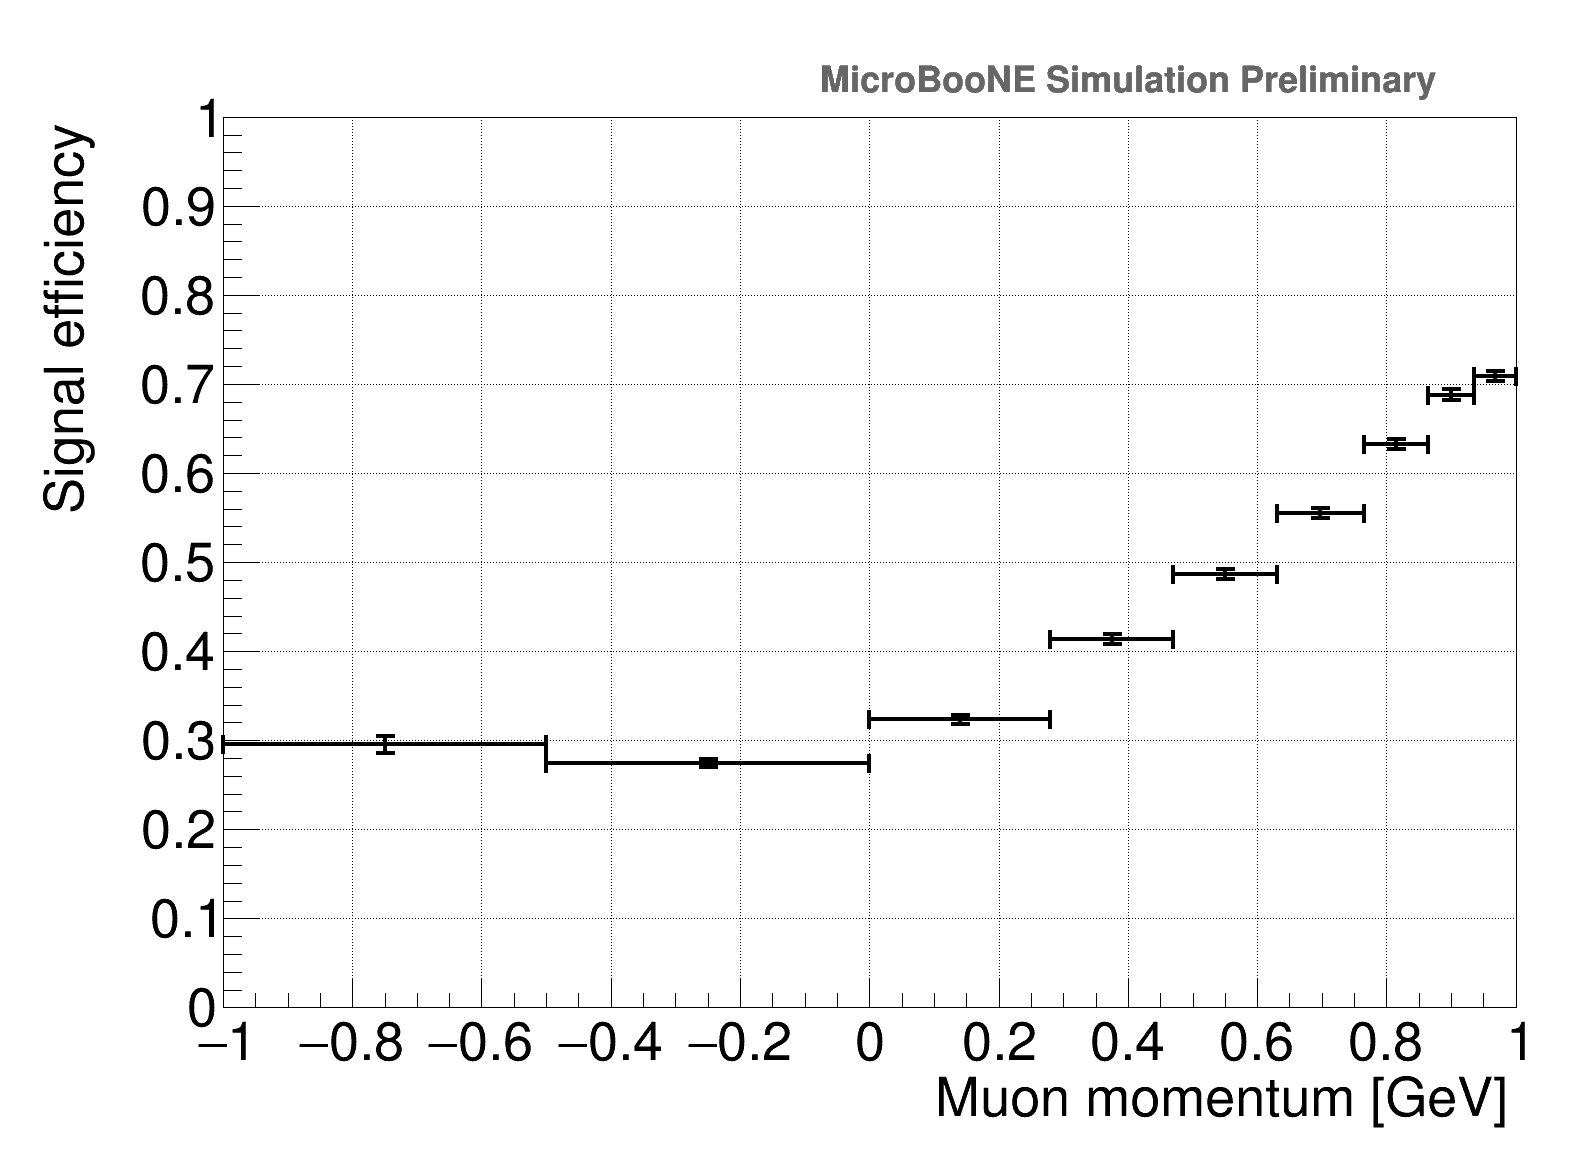

In [132]:
h_eff_tilde = ROOT.TH1F("h_eff_tilde",'Efficiency tilde',binnum,array('f',mom_bins))
for i in range(1,binnum+1):
    h_eff_tilde.SetBinContent(i,eff_tilde[i-1])
    h_eff_tilde.SetBinError(i,h_eff.GetBinError(i))
h_eff_tilde.SetMaximum(1)
h_eff_tilde.SetMinimum(0)
h_eff_tilde.SetLineWidth(3)

h_eff_tilde.SetXTitle("Muon momentum [GeV]")
h_eff_tilde.SetYTitle("Signal efficiency")
h_eff_tilde.GetYaxis().SetTitleSize(0.05)
h_eff_tilde.GetYaxis().SetTitleOffset(0.0)
h_eff_tilde.GetYaxis().SetLabelSize(0.05)
h_eff_tilde.GetXaxis().SetTitleSize(0.05)
h_eff_tilde.GetXaxis().SetLabelSize(0.05)
h_eff_tilde.GetXaxis().SetTitleOffset(1)
h_eff_tilde.SetLineColor(ROOT.kBlack)
h_eff_tilde.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(9)
c1.SetRightMargin(0.05)

h_eff_tilde.Draw('E1')
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_eff_tilde_xsecTheta.png")
c1.SaveAs(globale.outputdir_root + "h_eff_tilde_xsecTheta.root")
c1.SaveAs(globale.outputdir_pdf + "h_eff_tilde_xsecTheta.pdf")

h_eff_tilde.Write("h_eff_tilde")

In [133]:
weight_name = 'EventWeight*TunedCentralValue_Genie'
variable = 'cos(TrackTheta)'
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'

h_data = ROOT.TH1F("h_data",'h_data',binnum,array('f',mom_bins))
#h_ext = ROOT.TH1F("h_ext",'h_ext',binnum,array('f',mom_bins))
#h_dirt = ROOT.TH1F("h_dirt",'h_dirt',binnum,array('f',mom_bins))
h_overlay = ROOT.TH1F("h_overlay",'h_overlay',binnum,array('f',mom_bins))
h_signal = ROOT.TH1F("h_signal",'h_signal',binnum,array('f',mom_bins))

#h_weight_func_n = ROOT.TH1F("h_weight_func_n",'h_weight_func',binnum,array('f',mom_bins))

globale.data_out.Draw(variable+'>>h_data',cut,'')
#globale.ext_out.Draw(variable+'>>h_ext',cut,'')
#globale.dirt_out.Draw(variable+'>>h_dirt',weight_name+'*('+cut+')','')
globale.overlay_out.Draw(variable+'>>h_overlay',weight_name+'*('+cut+'&& !numu_signal)','')
globale.overlay_out.Draw(variable+'>>h_signal',weight_name+'*('+cut+'&& numu_signal)','')

h_true = ROOT.TH1F("h_true",'h_true',binnum,array('f',mom_bins))
globale.overlay_out.Draw(variable+'>>h_true',weight_name+'*(numu_true)','')

246811L

In [134]:
#lat = np.zeros(8,binnum)
for i in range(1,binnum+1):
    #print 'Entries in bin ',i,'-------------------------------------------------------------'
    n_da = h_data.GetBinContent(i)
    err_da = math.sqrt(n_da)
    #n_ext = h_ext.GetBinContent(i)
    #err_ext = math.sqrt(n_ext)
    #n_dirt = h_dirt.GetBinContent(i)
    #err_dirt = math.sqrt(n_dirt)
    n_ov = h_overlay.GetBinContent(i)
    err_ov = math.sqrt(n_ov)
    n_sig = h_signal.GetBinContent(i)
    err_sig = math.sqrt(n_sig)
    #print 'data: ',n_da, ' +- ',err_da,' Ext: ',n_ext,' +- ',err_ext,\
    #' Dirt: ',n_dirt,' +- ', err_dirt,' Overlay: ',n_ov,' +- ',err_ov,' Signal: ',n_sig,' +- ',err_sig
    #print ''
    print i,' & {0:0.2f}'.format(n_da*scale[data]), ' $\pm$ {0:0.2f}'.format(err_da*scale[data]),\
        ' & {0:0.2f}'.format(n_ov*scale[overlay]),' $\pm$ {0:0.2f}'.format(err_ov*scale[overlay]),\
        ' & {0:0.2f}'.format(n_sig*scale[overlay]),' $\pm$ {0:0.2f}'.format(err_sig*scale[overlay]),\
        #' & {0:0.2f}'.format(n_da - (n_ext*scale[ext]+n_dirt*scale[dirt]+n_ov*scale[overlay])), ' $\pm$ {0:0.2f}'.format( math.sqrt(err_da*err_da + err_ext*err_ext*scale[ext]*scale[ext] + err_dirt*err_dirt*scale[dirt]*scale[dirt] + err_ov*err_ov*scale[overlay]*scale[overlay]))
    
    
    
    #print 'data: {0:0.2f}'.format(n_da*scale[data]), ' +- {0:0.2f}'.format(err_da*scale[data])
    #print ' Ext: {0:0.2f}'.format(n_ext*scale[ext]),' +- {0:0.2f}'.format(err_ext*scale[ext])
    #print' Dirt: {0:0.2f}'.format(n_dirt*scale[dirt]),' +- {0:0.2f}'.format(err_dirt*scale[dirt])
    #print ' Overlay: {0:0.2f}'.format(n_ov*scale[overlay]),' +- {0:0.2f}'.format(err_ov*scale[overlay])
    #print ' Signal: {0:0.2f}'.format(n_sig*scale[overlay]),' +- {0:0.2f}'.format(err_sig*scale[overlay])
    #print 'Total back ground: {0:0.2f}'.format(n_ext*scale[ext]+n_dirt*scale[dirt]+n_ov*scale[overlay]), ' +- {0:0.2f}'.format(math.sqrt(err_ext*err_ext*scale[ext]*scale[ext] + err_dirt*err_dirt*scale[dirt]*scale[dirt] + err_ov*err_ov*scale[overlay]*scale[overlay]))
    #print 'Total data - background: {0:0.2f}'.format(n_da - (n_ext*scale[ext]+n_dirt*scale[dirt]+n_ov*scale[overlay])), ' +- {0:0.2f}'.format( math.sqrt(err_da*err_da + err_ext*err_ext*scale[ext]*scale[ext] + err_dirt*err_dirt*scale[dirt]*scale[dirt] + err_ov*err_ov*scale[overlay]*scale[overlay]))
    #lat[i-1][0]=i
print ''
 

print 'For total cross section'
n_da = h_data.Integral(0,binnum+1)
err_da = math.sqrt(n_da)
#n_ext = h_ext.Integral(0,binnum+1)
#err_ext = math.sqrt(n_ext)
#n_dirt = h_dirt.Integral(0,binnum+1)
#err_dirt = math.sqrt(n_dirt)
n_ov = h_overlay.Integral(0,binnum+1)
err_ov = math.sqrt(n_ov)
n_sig = h_signal.Integral(0,binnum+1)
err_sig = math.sqrt(n_sig)

n_true = h_true.Integral(0,binnum+1)
err_true = math.sqrt(n_true)

data_u = ufloat(n_da, err_da)*scale[data]
#ext_u = ufloat(n_ext, err_ext)*scale[ext]
#dirt_u = ufloat(n_dirt, err_dirt)*scale[dirt]
overlay_u = ufloat(n_ov, err_ov)*scale[overlay]
sig_u = ufloat(n_sig, err_sig)*scale[overlay]
true_u = ufloat(n_true, err_true)*scale[overlay]
eff_u = sig_u/true_u

xsec = (data_u - (overlay_u))/(eff_u*beam_flux*N_tot)# 

print i,' & {0:0.2f}'.format(n_da*scale[data]), ' $\pm$ {0:0.2f}'.format(err_da*scale[data]),\
        ' & {0:0.2f}'.format(n_ov*scale[overlay]),' $\pm$ {0:0.2f}'.format(err_ov*scale[overlay]),\
        ' & {0:0.2f}'.format(n_sig*scale[overlay]),' $\pm$ {0:0.2f}'.format(err_sig*scale[overlay]),\
        #' & {0:0.2f}'.format(n_da - (n_ext*scale[ext]+n_dirt*scale[dirt]+n_ov*scale[overlay])), ' $\pm$ {0:0.2f}'.format( math.sqrt(err_da*err_da + err_ext*err_ext*scale[ext]*scale[ext] + err_dirt*err_dirt*scale[dirt]*scale[dirt] + err_ov*err_ov*scale[overlay]*scale[overlay]))



1  & 3202.00  $\pm$ 56.59  & 1332.77  $\pm$ 19.51  & 1373.54  $\pm$ 19.80 2  & 3403.00  $\pm$ 58.34  & 766.34  $\pm$ 14.79  & 2154.54  $\pm$ 24.80 3  & 3934.00  $\pm$ 62.72  & 783.90  $\pm$ 14.96  & 2524.97  $\pm$ 26.85 4  & 4713.00  $\pm$ 68.65  & 783.87  $\pm$ 14.96  & 3234.24  $\pm$ 30.39 5  & 6478.00  $\pm$ 80.49  & 936.23  $\pm$ 16.35  & 4629.52  $\pm$ 36.36 6  & 8574.00  $\pm$ 92.60  & 1045.92  $\pm$ 17.28  & 6463.64  $\pm$ 42.96 7  & 9838.00  $\pm$ 99.19  & 1098.36  $\pm$ 17.71  & 7664.27  $\pm$ 46.78 8  & 10203.00  $\pm$ 101.01  & 1104.80  $\pm$ 17.76  & 8087.45  $\pm$ 48.05 9  & 11321.00  $\pm$ 106.40  & 1393.52  $\pm$ 19.95  & 9045.66  $\pm$ 50.82 
For total cross section
9  & 61666.00  $\pm$ 248.33  & 9245.72  $\pm$ 51.38  & 45177.84  $\pm$ 113.58


In [135]:
h_data.Sumw2()
#h_ext.Sumw2()
#h_dirt.Sumw2()
h_overlay.Sumw2()
h_data.Scale(globale.scale[globale.data])
#h_ext.Scale(globale.scale[globale.ext])
#h_dirt.Scale(globale.scale[globale.dirt])
h_overlay.Scale(globale.scale[globale.overlay])

h_data.Write("h_data")
#h_ext.Write("h_ext")
#h_dirt.Write("h_dirt")
h_overlay.Write("h_overlay")

474

Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created


In [136]:
data_points = np.zeros((binnum))
mc_bkg_points = np.zeros((binnum))
for i in range(1,binnum+1):
    data_points[i-1] = h_data.GetBinContent(i)
    mc_bkg_points[i-1] = h_overlay.GetBinContent(i)
    #mc_signal_points[i-1] = h_overlay_sig.GetBinContent(i)
print data_points
print mc_bkg_points
#print mc_signal_points
np.save('/home/tmettler/Desktop/weighted/xsec_momentum_fakedata/Wes/data_points_theta',data_points)
np.save('/home/tmettler/Desktop/weighted/xsec_momentum_fakedata/Wes/mc_bkg_points_theta',mc_bkg_points)

[ 3202.  3403.  3934.  4713.  6478.  8574.  9838. 10203. 11321.]
[1332.76843262  766.33587646  783.9029541   783.86834717  936.23272705
 1045.92492676 1098.36303711 1104.8034668  1393.52099609]


In [137]:
print h_overlay.GetSumOfWeights()
#h_data.Add(h_ext,-1)
#h_data.Add(h_dirt,-1)
h_data.Add(h_overlay,-1)
print h_data.GetSumOfWeights()

9245.72076416
52420.2781982


In [138]:
h_overlay_sig = ROOT.TH1F("h_overlay_sig",'h_overlay',binnum,array('f',mom_bins))
globale.overlay_out.Draw(variable+'>>h_overlay_sig',weight_name+'*('+cut+'&& numu_signal)','')
h_overlay_sig.Scale(globale.scale[globale.overlay])

h_true = ROOT.TH1F("h_true",'h_true',binnum,array('f',mom_bins))
globale.overlay_out.Draw('cos(MCNu_leptonTheta)'+'>>h_true',weight_name+'*(numu_true)','')

h_true.Scale(globale.scale[globale.overlay])
h_true.SetLineColor(ROOT.kYellow)
h_true.SetLineWidth(4)

Warning in <TFile::Append>: Replacing existing TH1: h_true (Potential memory leak).


In [139]:
mc_signal_points = np.zeros((binnum))

for i in range(1,binnum+1):
    #data_points[i-1] = h_data.GetBinContent(i)
    #mc_bkg_points[i-1] = h_overlay.GetBinContent(i)
    mc_signal_points[i-1] = h_overlay_sig.GetBinContent(i)
#print data_points
#print mc_bkg_points
print mc_signal_points
#np.save('/home/tmettler/Desktop/weighted/xsec_momentum_fakedata/Wes/data_points',data_points)
np.save('/home/tmettler/Desktop/weighted/xsec_momentum_fakedata/Wes/mc_signal_points_theta',mc_signal_points)

[1373.54199219 2154.53881836 2524.97314453 3234.24145508 4629.51708984
 6463.64306641 7664.27246094 8087.44873047 9045.6640625 ]


492

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/png/h_data_theta_bkgsubtracted.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/root/h_data_theta_bkgsubtracted.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/pdf/h_data_theta_bkgsubtracted.pdf has been created


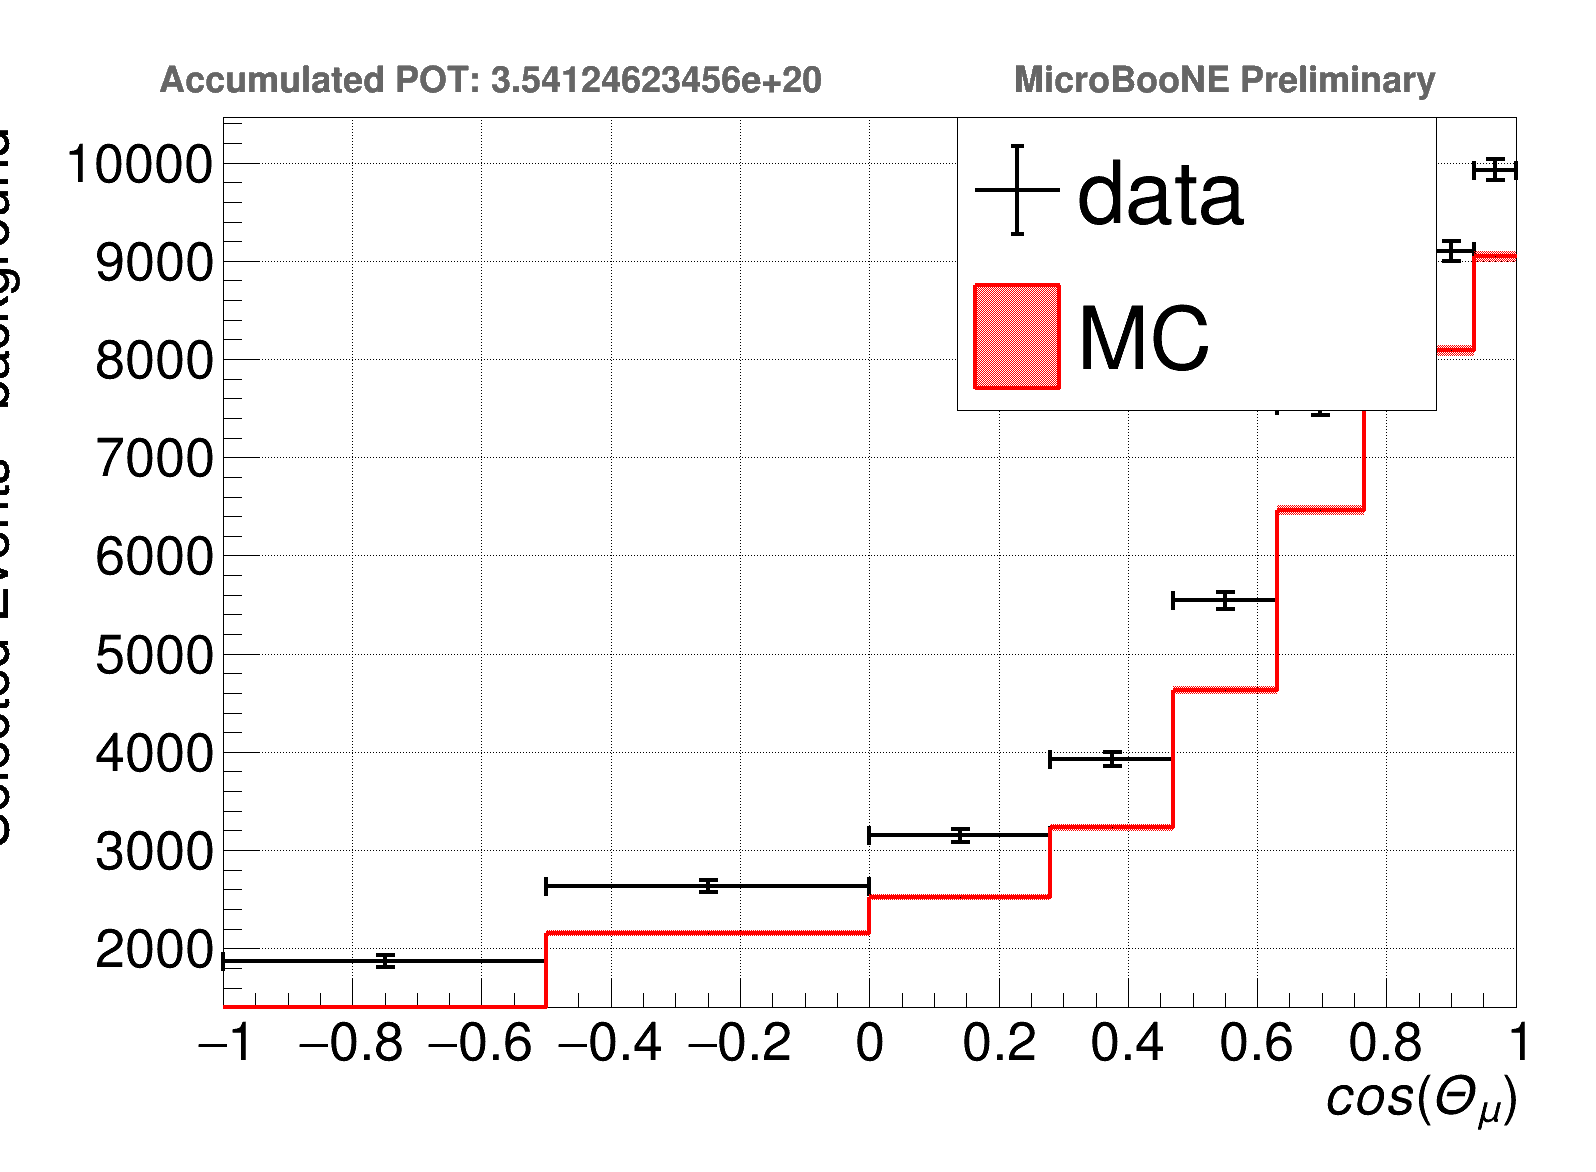

In [140]:
legend = ROOT.TLegend(0.6,0.65,0.9,0.9)
h_overlay_sig.SetLineColor(2)
legend.AddEntry(h_data,'data',"lep");
legend.AddEntry(h_overlay_sig,'MC',"f");
h_data.SetYTitle("Selected Events - background")
h_data.SetXTitle("cos(\Theta_{\mu})")
h_data.SetLineWidth(3)
#h_data.SetMaximum(300)

h_data.GetYaxis().SetTitleSize(0.05)
h_data.GetYaxis().SetTitleOffset(0.0)
h_data.GetYaxis().SetLabelSize(0.05)
h_data.GetXaxis().SetTitleSize(0.05)
h_data.GetXaxis().SetLabelSize(0.05)
h_data.GetXaxis().SetTitleOffset(1)
h_data.SetLineColor(ROOT.kBlack)
h_data.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(9)
c1.SetRightMargin(0.05)

h_data.Draw('E1')
h_overlay_sig.SetFillColor(0)
h_overlay_sig.SetLineWidth(4)
#h_overlay_sig.Draw('hist same')
h_overlay_sig.DrawCopy('Hist same')
h_overlay_sig.SetFillColor(2)
h_overlay_sig.SetFillStyle(3001)
h_overlay_sig.Draw('E2 same')
legend.Draw()
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_data_theta_bkgsubtracted.png")
c1.SaveAs(outputdir_root + "h_data_theta_bkgsubtracted.root")
c1.SaveAs(outputdir_pdf + "h_data_theta_bkgsubtracted.pdf")

h_data.Write("h_data_theta_bkgsubtracted")
h_overlay_sig.Write("h_MC_theta_bkgsubtracted")

In [141]:
for i in range(1,binnum+1):
    h_data.SetBinContent(i,h_data.GetBinContent(i)/h_data.GetBinWidth(i))
    h_overlay_sig.SetBinContent(i,h_overlay_sig.GetBinContent(i)/h_overlay_sig.GetBinWidth(i))
    h_data.SetBinError(i,h_data.GetBinError(i)/h_data.GetBinWidth(i))
    h_overlay_sig.SetBinError(i,h_overlay_sig.GetBinError(i)/h_overlay_sig.GetBinWidth(i))
    h_true.SetBinContent(i,h_true.GetBinContent(i)/h_true.GetBinWidth(i))
    h_true.SetBinError(i,h_true.GetBinError(i)/h_true.GetBinWidth(i))
    print h_data.GetBinContent(i)/h_data.GetBinWidth(i)

7476.92626953
10546.65625
40179.8093992
108840.215182
216475.297807
413063.165754
873963.229131
1856775.07812
2349699.12465


495

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/png/h_data_theta_bkgsubtracted_binwidth.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/root/h_data_theta_bkgsubtracted_binwidth.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/pdf/h_data_theta_bkgsubtracted_binwidth.pdf has been created


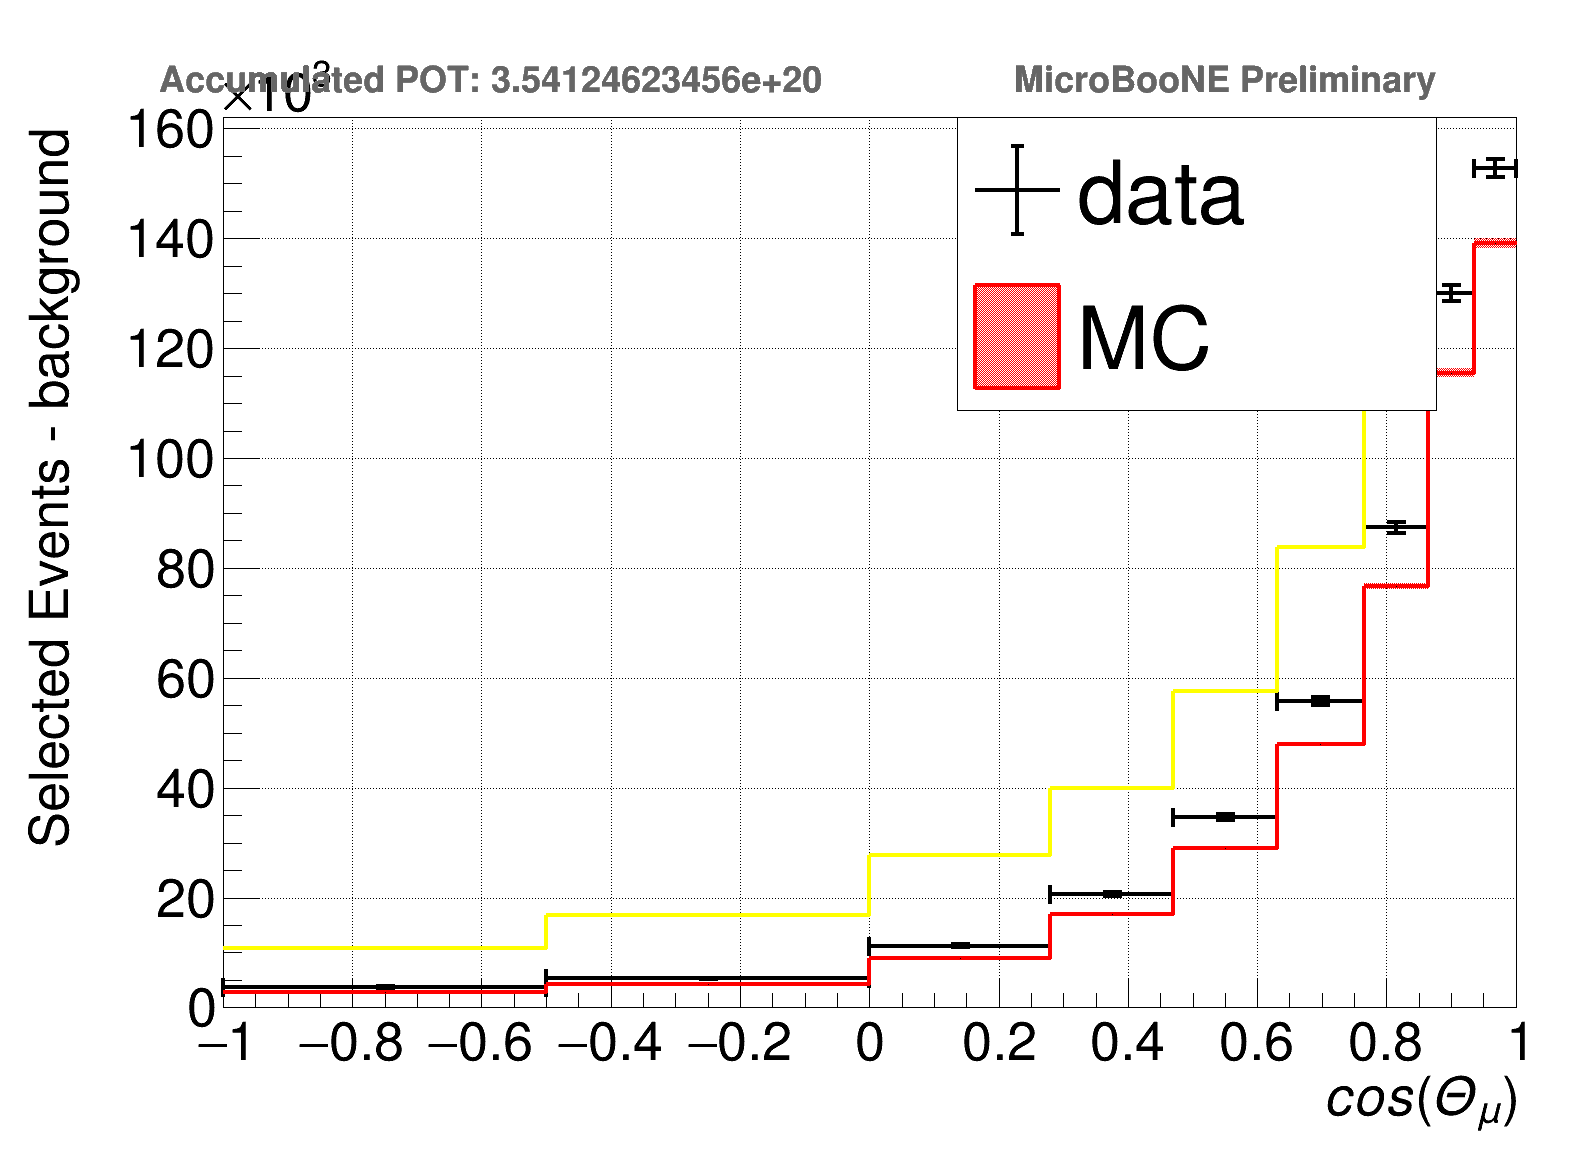

In [142]:
legend = ROOT.TLegend(0.6,0.65,0.9,0.9)
h_overlay_sig.SetLineColor(2)
legend.AddEntry(h_data,'data',"lep");
legend.AddEntry(h_overlay_sig,'MC',"f");
h_data.SetYTitle("Selected Events - background")
h_data.SetXTitle("cos(\Theta_{\mu})")
h_data.SetLineWidth(3)
#h_data.SetMaximum(6000)

h_data.GetYaxis().SetTitleSize(0.05)
h_data.GetYaxis().SetTitleOffset(0.0)
h_data.GetYaxis().SetLabelSize(0.05)
h_data.GetXaxis().SetTitleSize(0.05)
h_data.GetXaxis().SetLabelSize(0.05)
h_data.GetXaxis().SetTitleOffset(1)
h_data.SetLineColor(ROOT.kBlack)
h_data.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(9)
c1.SetRightMargin(0.05)

h_data.Draw('E1')
h_overlay_sig.SetFillColor(0)
h_overlay_sig.SetLineWidth(4)
#h_overlay_sig.Draw('hist same')
h_overlay_sig.DrawCopy('Hist same')
h_overlay_sig.SetFillColor(2)
h_overlay_sig.SetFillStyle(3001)
h_overlay_sig.Draw('E2 same')
h_true.Draw('hist same')

legend.Draw()
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_data_theta_bkgsubtracted_binwidth.png")
c1.SaveAs(outputdir_root + "h_data_theta_bkgsubtracted_binwidth.root")
c1.SaveAs(outputdir_pdf + "h_data_theta_bkgsubtracted_binwidth.pdf")

h_data.Write("h_data_theta_bkgsubtracted_binwidth")
h_overlay_sig.Write("h_MC_theta_bkgsubtracted_binwidth")

In [143]:
h_data.Divide(h_eff_tilde)
h_data.Scale(1.0/(N_tot*beam_flux*1e-38))

In [144]:
h_overlay_sig.Divide(h_eff_tilde)
h_overlay_sig.Scale(1.0/(N_tot*beam_flux*1e-38))

h_true.Scale(1.0/(N_tot*beam_flux*1e-38))

In [145]:
h_true_smeare = h_true.Clone()
true_bins = np.zeros((binnum))
for i in range(1,binnum+1):
    true_bins[i-1] = h_true.GetBinContent(i)
    
true_bins_smeared = np.zeros((binnum))

true_bins_smeared = mitigation_matrix.dot(true_bins)

for i in range(1,binnum+1):
    h_true_smeare.SetBinContent(i,true_bins_smeared[i-1])
    print true_bins_smeared[i-1]
h_true_smeare.SetLineColor(ROOT.kGreen)
h_true_smeare.SetLineWidth(4)

0.11347895372493957
0.16183686424271285
0.26234893863145453
0.37487884338719113
0.5477839758567004
0.8081566066189522
1.1264995161737625
1.5043939891871305
1.7829254428038348


In [153]:
check_wes = 0.0
stat_err_theta = np.zeros((binnum))
frac_stat_err_theta = np.zeros((binnum))
for i in range(1,binnum+1):
    #print 'Entries in bin ',i,'-------------------------------------------------------------'
    #print h_data.GetBinContent(i),h_data.GetBinError(i),h_data.GetBinError(i)/h_data.GetBinContent(i)
    check_wes = check_wes+h_data.GetBinContent(i) *h_data.GetBinWidth(i)
    #print h_data.GetBinWidth(i)
    #print mom_bins[i]- mom_bins[i-1]
    stat_err_theta[i-1] = h_data.GetBinError(i)
    frac_stat_err_theta[i-1] = h_data.GetBinError(i)/h_data.GetBinContent(i)
print check_wes
print stat_err_theta
print frac_stat_err_theta
np.save('/home/tmettler/Desktop/weighted/xsec_momentum_fakedata/Wes/mc_signal_points_theta',mc_signal_points)

0.943597549453
[0.00539613 0.0052673  0.00845707 0.01049665 0.01254646 0.01518293
 0.01886008 0.02524751 0.02754937]
[0.04576528 0.0293795  0.02605779 0.02252282 0.01890067 0.01618966
 0.01463392 0.01433199 0.01371447]


In [147]:
print pot_data
print flux
print flux/pot_data
print N_tot

3.54124623456e+20
7.3789785277e-10
2.08372364951e-30
4.10331109202e+31


482

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/png/h_xsec_corr_theta.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/root/h_xsec_corr_theta.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_momentum_fakedata/pdf/h_xsec_corr_theta.pdf has been created


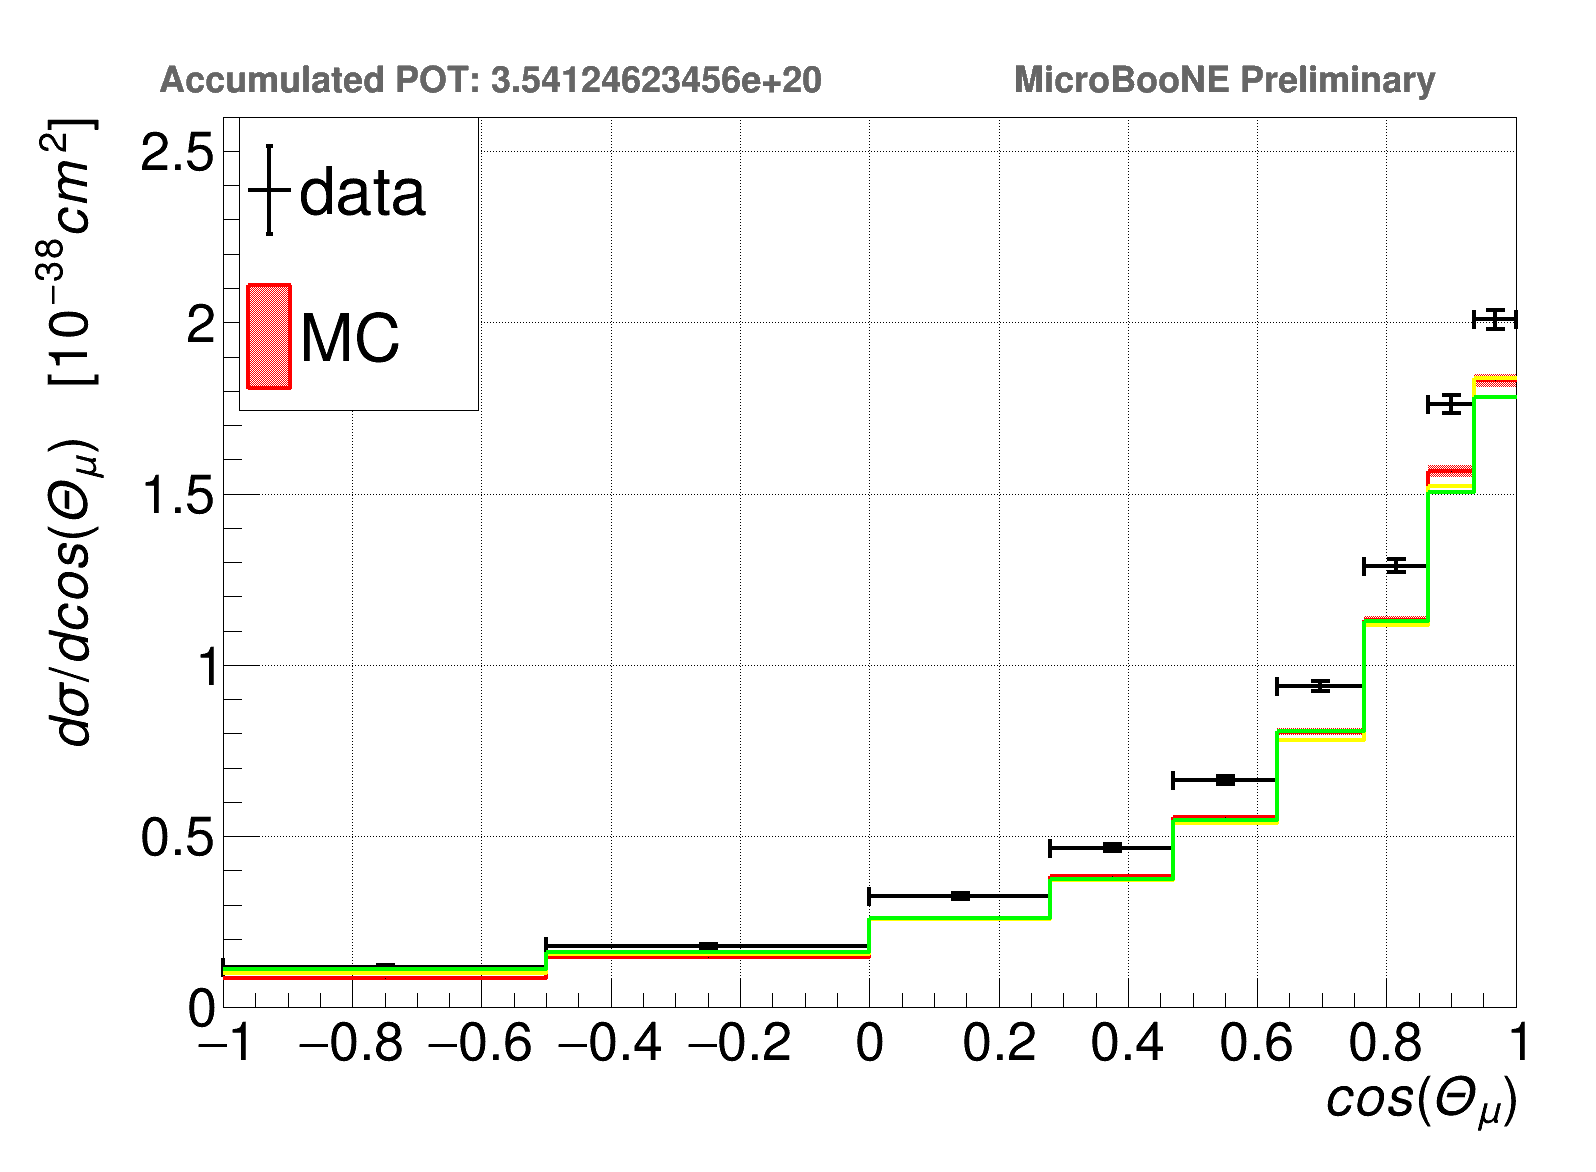

In [148]:
legend = ROOT.TLegend(0.15,0.65,0.3,0.9)
h_overlay_sig.SetLineColor(2)
legend.AddEntry(h_data,'data',"lep");
legend.AddEntry(h_overlay_sig,'MC',"f");
h_data.SetYTitle("d\sigma / dcos(\Theta_{\mu}) \t [10^{-38} cm^{2}]")
h_data.SetXTitle("cos(\Theta_{\mu})")
h_data.SetLineWidth(3)

h_data.GetYaxis().SetTitleSize(0.05)
h_data.GetYaxis().SetTitleOffset(0.0)
h_data.GetYaxis().SetLabelSize(0.05)
h_data.GetXaxis().SetTitleSize(0.05)
h_data.GetXaxis().SetLabelSize(0.05)
h_data.GetXaxis().SetTitleOffset(1)
h_data.SetMaximum(2.6)
h_data.SetMinimum(0)
h_data.SetLineColor(ROOT.kBlack)
h_data.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(9)
c1.SetRightMargin(0.05)

h_data.Draw('E1')
h_overlay_sig.SetFillColor(0)
h_overlay_sig.SetLineWidth(4)
#h_overlay_sig.Draw('hist same')
h_overlay_sig.DrawCopy('Hist same')
h_overlay_sig.SetFillColor(2)
h_overlay_sig.SetFillStyle(3001)
h_overlay_sig.Draw('E2 same')
h_true.Draw('hist same')
h_true_smeare.Draw('hist same')

legend.Draw()
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_xsec_corr_theta.png")
c1.SaveAs(outputdir_root + "h_xsec_corr_theta.root")
c1.SaveAs(outputdir_pdf + "h_xsec_corr_theta.pdf")

h_data.Write("h_xsec_data_theta")
h_overlay_sig.Write("h_xsec_MC_theta")

In [78]:
dfgsdg

NameError: name 'dfgsdg' is not defined

In [ ]:
# close the root file with all the histos
RootFile.Close()

In [152]:
# load the stuff for wes
path_wes = '/home/tmettler/Desktop/weighted/xsec_momentum_fakedata/Wes/'

data_points_theta = np.load(path_wes+'data_points_theta.npy')
mc_bkg_points_theta = np.load(path_wes+'mc_bkg_points_theta.npy')
theta_bins = np.load(path_wes+'theta_bins.npy')
eff_tilde_theta = np.load(path_wes+'eff_tilde_theta.npy')
true_efficiency_theta = np.load(path_wes+'true_efficiency_theta.npy')
stat_err_arr = np.load(path_wes+'stat_err_arr.npy')
flux_err_arr = np.load(path_wes+'flux_err_arr.npy')
target_nucl_fd = 4.10331109202e+31
flux_fd = 3.54124623456e+20*7.3789785277e-10

print data_points_theta
#print mc_bkg_points_theta
#print theta_bins
#print eff_tilde_theta
print stat_err_arr
print flux_err_arr

[ 3202.  3403.  3934.  4713.  6478.  8574.  9838. 10203. 11321.]
[0.06922865 0.14677861 0.11089236 0.05355841 0.02122593 0.00352164]
[0.02361319 0.11744292 0.13590484 0.10332385 0.03172121 0.00200715]


In [116]:
dxsec_dcth_fd = [ (data_points_theta[i]-mc_bkg_points_theta[i])/(theta_bins[i+1]-theta_bins[i])/(flux_fd*target_nucl_fd*eff_tilde_theta[i]) for i in range(len(data_points_theta))]


In [117]:
xsec_tot_dcth_fd_check=0
for i in range(len(dxsec_dcth_fd)):
    xsec_tot_dcth_fd_check += dxsec_dcth_fd[i]*(theta_bins[i+1]-theta_bins[i])    
print xsec_tot_dcth_fd_check

9.43597558581661e-39


In [118]:
check_tilde=0
check_true = 0
for i in range(len(dxsec_dcth_fd)):
    check_tilde += eff_tilde_theta[i]*(theta_bins[i+1]-theta_bins[i])
    check_true += true_efficiency_theta[i]*(theta_bins[i+1]-theta_bins[i])
    
print check_tilde
print check_true

print xsec_tot_dcth_fd_check*check_true/check_tilde

0.7643925264540754
0.7522015511989595
9.285485175597405e-39


In [151]:
# load the stuff for wes
path_wes = '/home/tmettler/Desktop/weighted/xsec_momentum_fakedata/google_folder/Data_for_Wes/'

data_points_theta = np.load(path_wes+'data_points_theta.npy')
mc_bkg_points_theta = np.load(path_wes+'mc_bkg_points_theta.npy')
theta_bins = np.load(path_wes+'theta_bins.npy')
eff_tilde_theta = np.load(path_wes+'eff_tilde_theta.npy')
true_efficiency_theta = np.load(path_wes+'true_efficiency_theta.npy')
stat_err_arr = np.load(path_wes+'stat_err_arr.npy')
target_nucl_fd = 4.10331109202e+31
flux_fd = 3.54124623456e+20*7.3789785277e-10

print data_points_theta
#print mc_bkg_points_theta
#print theta_bins
#print eff_tilde_theta
print stat_err_arr

[ 3202.  3403.  3934.  4713.  6478.  8574.  9838. 10203. 11321.]
[0.05128024 0.14896974 0.15702987 0.11208808 0.03491839 0.00245887]


In [120]:
dxsec_dcth_fd = [ (data_points_theta[i]-mc_bkg_points_theta[i])/(theta_bins[i+1]-theta_bins[i])/(flux_fd*target_nucl_fd*eff_tilde_theta[i]) for i in range(len(data_points_theta))]
xsec_tot_dcth_fd_check=0
for i in range(len(dxsec_dcth_fd)):
    xsec_tot_dcth_fd_check += dxsec_dcth_fd[i]*(theta_bins[i+1]-theta_bins[i])    
print xsec_tot_dcth_fd_check

9.522001301383232e-39


In [121]:
xsec_tot_dcth_fd_check=0

for i in range(len(dxsec_dcth_fd)):
    xsec_tot_dcth_fd_check += dxsec_dcth_fd[i]*(theta_bins[i+1]-theta_bins[i]) 